<a href="https://colab.research.google.com/github/D4deben/DA6401_Assignment1/blob/main/DL_Final_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install wandb -qU
# !pip install numpy
# !pip install matplotlib
# !pip install pandas


In [ ]:
import wandb
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
wandb.login()
import wandb

# Initialize wandb
wandb.init(
    project="DL_A1" ,resume=True
)


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cs24m016 (cs24m016-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


# Question 01

In [ ]:
#loading the dataset

from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names= ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


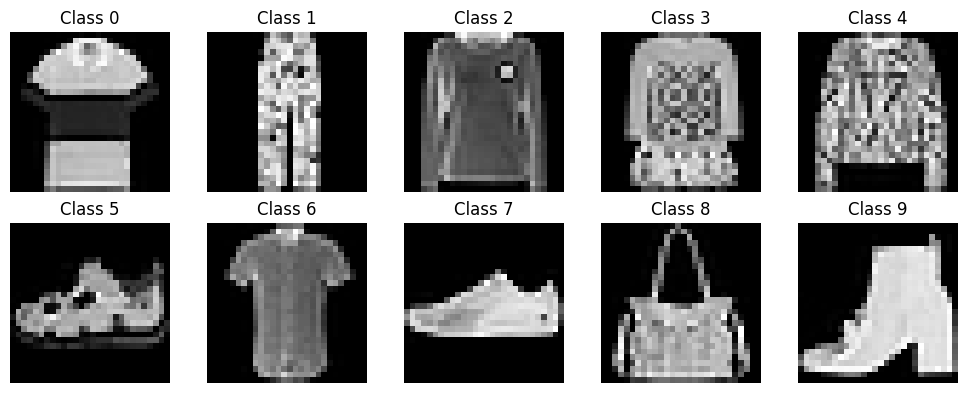

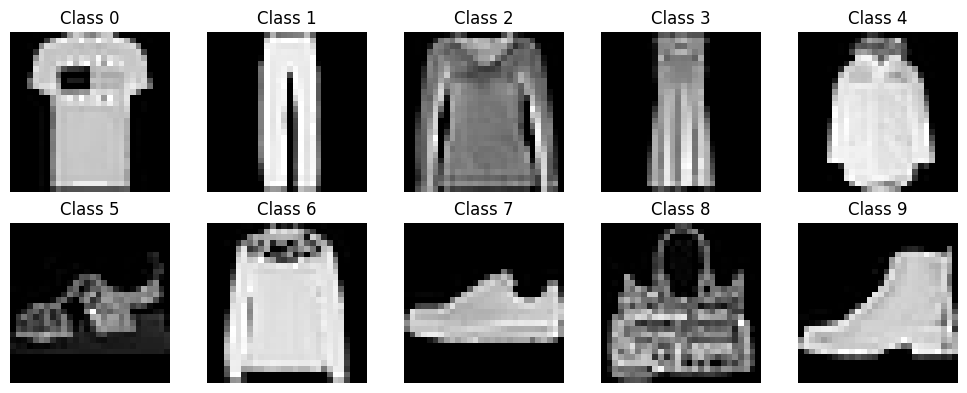

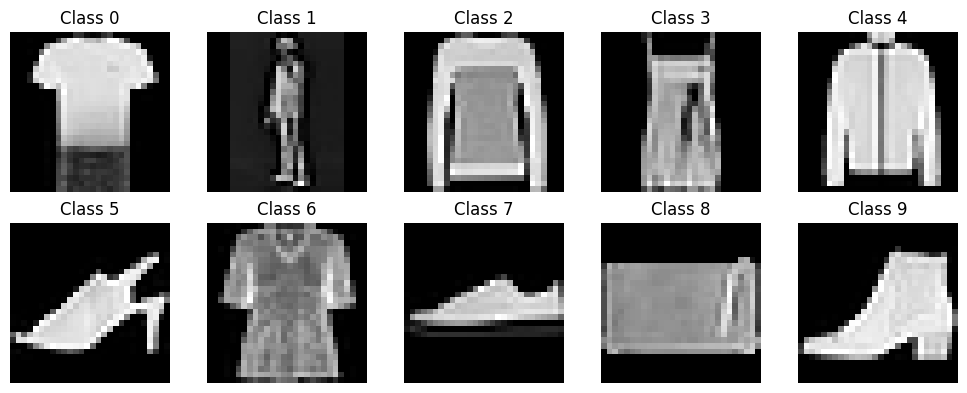

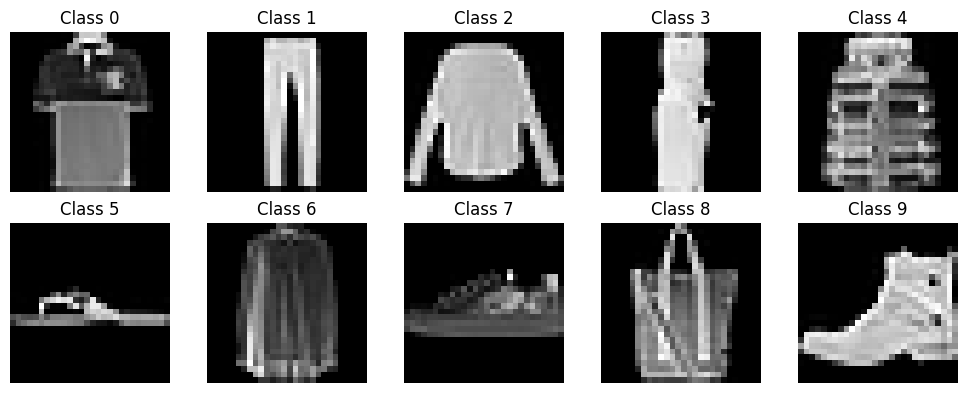

KeyboardInterrupt: 

In [ ]:
classes = np.unique(y_train)
for i in range(50):
  # Initialize a Wandb run for project "DL_A1"
  wandb.init(project="DL_A1")

  # Get unique classes


  # Select random images from each class
  random_images = []
  for class_id in classes:
      # Find all occurrences of the class
      indices = np.where(y_train == class_id)[0]
      # Select a random index from the occurrences
      random_idx = np.random.choice(indices)
      random_images.append((X_train[random_idx], class_id))


  # Log random images to Wandb
  wandb_images = [wandb.Image(img, caption=f"Class {label}") for img, label in random_images]
  wandb.log({"random_class_images": wandb_images})

  # Plot the random images locally for verification
  fig, axs = plt.subplots(2, 5, figsize=(10, 4))
  for i, (img, label) in enumerate(random_images):
      axs[i // 5, i % 5].imshow(img, cmap='gray')
      axs[i // 5, i % 5].set_title(f'Class {label}')
      axs[i // 5, i % 5].axis('off')

  plt.tight_layout()
  plt.show()
  wandb.finish()

In [ ]:
def train():
    wandb.init()
    config = wandb.config
    classes = np.unique(y_train)

    for step in range(config.step):
        random_images = []

        for class_id in classes:
            indices = np.where(y_train == class_id)[0]
            random_idx = np.random.choice(indices)
            random_images.append((X_train[random_idx], class_id))

        # Log random images to W&B
        wandb_images = [wandb.Image(img, caption=f"Class {label}") for img, label in random_images]
        wandb.log({"random_class_images": wandb_images, "step": step})
        # # Plot images locally for verification
        # fig, axs = plt.subplots(2, 5, figsize=(10, 4))
        # for i, (img, label) in enumerate(random_images):
        #     axs[i // 5, i % 5].imshow(img, cmap='gray')
        #     axs[i // 5, i % 5].set_title(f'Class {label}')
        #     axs[i // 5, i % 5].axis('off')

        # plt.tight_layout()
        # plt.show()

    wandb.finish()

# Sweep Configuration
sweep_config = {
    "method": "random",
    "metric": {
        "name": "accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "learning_rate": {"min": 0.0001, "max": 0.1},
        "step": {"values": [1, 2, 3]},  # Step (epoch) slider range
        "optimizer": {"values": ["adam", "sgd", "rmsprop"]},
        "hidden_units": {"value": 64},
        "index": {"min": 0, "max": 9}  # Index slider range (for classes)
    }
}

# Initialize the sweep
sweep_id = wandb.sweep(sweep_config, project="DL_A1")

# Run the sweep for 100 iterations
wandb.agent(sweep_id, function=train, count=50)


Create sweep with ID: pjm6zb7x
Sweep URL: https://wandb.ai/cs24m016-indian-institute-of-technology-madras/DL_A1/sweeps/pjm6zb7x


wandb: Agent Starting Run: 38c1tjxv with config:
wandb: 	hidden_units: 64
wandb: 	index: 3
wandb: 	learning_rate: 0.06193329972068538
wandb: 	optimizer: rmsprop
wandb: 	step: 1


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ta485pib with config:
wandb: 	hidden_units: 64
wandb: 	index: 1
wandb: 	learning_rate: 0.022019468107897466
wandb: 	optimizer: adam
wandb: 	step: 1


wandb: Agent Starting Run: vgq9rcy1 with config:
wandb: 	hidden_units: 64
wandb: 	index: 0
wandb: 	learning_rate: 0.03748442928773961
wandb: 	optimizer: rmsprop
wandb: 	step: 3


wandb: Agent Starting Run: rdp5tpv4 with config:
wandb: 	hidden_units: 64
wandb: 	index: 5
wandb: 	learning_rate: 0.09479498710043172
wandb: 	optimizer: sgd
wandb: 	step: 1


wandb: Agent Starting Run: rxlr9ldw with config:
wandb: 	hidden_units: 64
wandb: 	index: 6
wandb: 	learning_rate: 0.003293098706702204
wandb: 	optimizer: sgd
wandb: 	step: 3


wandb: Agent Starting Run: 6pzfbg29 with config:
wandb: 	hidden_units: 64
wandb: 	index: 1
wandb: 	learning_rate: 0.07318519899316445
wandb: 	optimizer: rmsprop
wandb: 	step: 3


wandb: Agent Starting Run: 8ur3sk4p with config:
wandb: 	hidden_units: 64
wandb: 	index: 7
wandb: 	learning_rate: 0.012960072751323768
wandb: 	optimizer: rmsprop
wandb: 	step: 2


wandb: Agent Starting Run: ww0i22ci with config:
wandb: 	hidden_units: 64
wandb: 	index: 7
wandb: 	learning_rate: 0.02405568268764026
wandb: 	optimizer: sgd
wandb: 	step: 2


wandb: Agent Starting Run: pnwitla7 with config:
wandb: 	hidden_units: 64
wandb: 	index: 8
wandb: 	learning_rate: 0.00304745875012703
wandb: 	optimizer: rmsprop
wandb: 	step: 3


wandb: Agent Starting Run: ate2kw97 with config:
wandb: 	hidden_units: 64
wandb: 	index: 5
wandb: 	learning_rate: 0.04134482611076123
wandb: 	optimizer: sgd
wandb: 	step: 2


wandb: Agent Starting Run: mtmsdyeq with config:
wandb: 	hidden_units: 64
wandb: 	index: 9
wandb: 	learning_rate: 0.032978894765695356
wandb: 	optimizer: adam
wandb: 	step: 1


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kgczvqfx with config:
wandb: 	hidden_units: 64
wandb: 	index: 2
wandb: 	learning_rate: 0.0445712966948686
wandb: 	optimizer: adam
wandb: 	step: 2


wandb: Agent Starting Run: e5p9rq4x with config:
wandb: 	hidden_units: 64
wandb: 	index: 1
wandb: 	learning_rate: 0.02024069117844601
wandb: 	optimizer: rmsprop
wandb: 	step: 3


wandb: Agent Starting Run: g3l72pgl with config:
wandb: 	hidden_units: 64
wandb: 	index: 9
wandb: 	learning_rate: 0.04048213536632672
wandb: 	optimizer: sgd
wandb: 	step: 2


wandb: Agent Starting Run: kq8tlma9 with config:
wandb: 	hidden_units: 64
wandb: 	index: 3
wandb: 	learning_rate: 0.010010437434973476
wandb: 	optimizer: sgd
wandb: 	step: 2


wandb: Agent Starting Run: ewbc7ber with config:
wandb: 	hidden_units: 64
wandb: 	index: 1
wandb: 	learning_rate: 0.0307460065871458
wandb: 	optimizer: sgd
wandb: 	step: 1


wandb: Agent Starting Run: me9yukix with config:
wandb: 	hidden_units: 64
wandb: 	index: 3
wandb: 	learning_rate: 0.03835513494164761
wandb: 	optimizer: adam
wandb: 	step: 2


wandb: Agent Starting Run: yh0flcxn with config:
wandb: 	hidden_units: 64
wandb: 	index: 6
wandb: 	learning_rate: 0.07640623864523997
wandb: 	optimizer: adam
wandb: 	step: 2


wandb: Agent Starting Run: sz4c40n0 with config:
wandb: 	hidden_units: 64
wandb: 	index: 8
wandb: 	learning_rate: 0.04613908196021427
wandb: 	optimizer: sgd
wandb: 	step: 3


wandb: Agent Starting Run: 21ja4wz5 with config:
wandb: 	hidden_units: 64
wandb: 	index: 6
wandb: 	learning_rate: 0.08822432136954944
wandb: 	optimizer: adam
wandb: 	step: 1


wandb: Agent Starting Run: pi279908 with config:
wandb: 	hidden_units: 64
wandb: 	index: 9
wandb: 	learning_rate: 0.0665051368869936
wandb: 	optimizer: rmsprop
wandb: 	step: 3


wandb: Agent Starting Run: ctvfgdh6 with config:
wandb: 	hidden_units: 64
wandb: 	index: 7
wandb: 	learning_rate: 0.06001260759380072
wandb: 	optimizer: rmsprop
wandb: 	step: 1


wandb: Agent Starting Run: xnfe6705 with config:
wandb: 	hidden_units: 64
wandb: 	index: 9
wandb: 	learning_rate: 0.07331674910392211
wandb: 	optimizer: adam
wandb: 	step: 2


wandb: Agent Starting Run: bgri54bo with config:
wandb: 	hidden_units: 64
wandb: 	index: 8
wandb: 	learning_rate: 0.044465200418850735
wandb: 	optimizer: rmsprop
wandb: 	step: 2


wandb: Agent Starting Run: 8gwvisr2 with config:
wandb: 	hidden_units: 64
wandb: 	index: 2
wandb: 	learning_rate: 0.05063910048022762
wandb: 	optimizer: sgd
wandb: 	step: 1


wandb: Agent Starting Run: z3gv9k5s with config:
wandb: 	hidden_units: 64
wandb: 	index: 7
wandb: 	learning_rate: 0.04300326558314192
wandb: 	optimizer: adam
wandb: 	step: 1


wandb: Agent Starting Run: b8c43clf with config:
wandb: 	hidden_units: 64
wandb: 	index: 5
wandb: 	learning_rate: 0.08676209707144153
wandb: 	optimizer: sgd
wandb: 	step: 1


wandb: Agent Starting Run: 53styouk with config:
wandb: 	hidden_units: 64
wandb: 	index: 5
wandb: 	learning_rate: 0.029277767538299235
wandb: 	optimizer: adam
wandb: 	step: 2


wandb: Agent Starting Run: gnj469nz with config:
wandb: 	hidden_units: 64
wandb: 	index: 1
wandb: 	learning_rate: 0.09512470001829772
wandb: 	optimizer: sgd
wandb: 	step: 3


wandb: Agent Starting Run: 2nx2s1wo with config:
wandb: 	hidden_units: 64
wandb: 	index: 7
wandb: 	learning_rate: 0.03352693513519423
wandb: 	optimizer: adam
wandb: 	step: 1


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: slzwger1 with config:
wandb: 	hidden_units: 64
wandb: 	index: 2
wandb: 	learning_rate: 0.015300299674466116
wandb: 	optimizer: sgd
wandb: 	step: 3


wandb: Agent Starting Run: ixwfrchh with config:
wandb: 	hidden_units: 64
wandb: 	index: 7
wandb: 	learning_rate: 0.06111653382563919
wandb: 	optimizer: adam
wandb: 	step: 1


wandb: Agent Starting Run: jnb1lyv7 with config:
wandb: 	hidden_units: 64
wandb: 	index: 6
wandb: 	learning_rate: 0.031794391857011675
wandb: 	optimizer: adam
wandb: 	step: 2


wandb: Agent Starting Run: x0a4vhq6 with config:
wandb: 	hidden_units: 64
wandb: 	index: 8
wandb: 	learning_rate: 0.026044106920288024
wandb: 	optimizer: sgd
wandb: 	step: 3


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: w8k99h3a with config:
wandb: 	hidden_units: 64
wandb: 	index: 3
wandb: 	learning_rate: 0.03875461167857625
wandb: 	optimizer: rmsprop
wandb: 	step: 2


wandb: Agent Starting Run: 604nouff with config:
wandb: 	hidden_units: 64
wandb: 	index: 0
wandb: 	learning_rate: 0.027625930732801743
wandb: 	optimizer: sgd
wandb: 	step: 3


wandb: Agent Starting Run: n5122bex with config:
wandb: 	hidden_units: 64
wandb: 	index: 2
wandb: 	learning_rate: 0.08567439092211036
wandb: 	optimizer: adam
wandb: 	step: 1


wandb: Agent Starting Run: pgdj5zw0 with config:
wandb: 	hidden_units: 64
wandb: 	index: 5
wandb: 	learning_rate: 0.07428683120569478
wandb: 	optimizer: adam
wandb: 	step: 3


wandb: Agent Starting Run: 5vjg7qkc with config:
wandb: 	hidden_units: 64
wandb: 	index: 0
wandb: 	learning_rate: 0.07715530694761763
wandb: 	optimizer: rmsprop
wandb: 	step: 1


wandb: Agent Starting Run: zgwgumfd with config:
wandb: 	hidden_units: 64
wandb: 	index: 9
wandb: 	learning_rate: 0.016378976755653238
wandb: 	optimizer: adam
wandb: 	step: 3


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dpwthc2e with config:
wandb: 	hidden_units: 64
wandb: 	index: 6
wandb: 	learning_rate: 0.03156014564969566
wandb: 	optimizer: sgd
wandb: 	step: 3


wandb: Agent Starting Run: mez9jkj8 with config:
wandb: 	hidden_units: 64
wandb: 	index: 0
wandb: 	learning_rate: 0.04444038160590531
wandb: 	optimizer: rmsprop
wandb: 	step: 2


wandb: Agent Starting Run: 9oz067j2 with config:
wandb: 	hidden_units: 64
wandb: 	index: 5
wandb: 	learning_rate: 0.056332987990989555
wandb: 	optimizer: rmsprop
wandb: 	step: 1


wandb: Agent Starting Run: eammazyo with config:
wandb: 	hidden_units: 64
wandb: 	index: 0
wandb: 	learning_rate: 0.07218717795750462
wandb: 	optimizer: rmsprop
wandb: 	step: 2


wandb: Agent Starting Run: 5hq1qevt with config:
wandb: 	hidden_units: 64
wandb: 	index: 9
wandb: 	learning_rate: 0.08843110125994731
wandb: 	optimizer: sgd
wandb: 	step: 1


wandb: Agent Starting Run: i7weuaw5 with config:
wandb: 	hidden_units: 64
wandb: 	index: 9
wandb: 	learning_rate: 0.02585712776532732
wandb: 	optimizer: rmsprop
wandb: 	step: 2


wandb: Agent Starting Run: 60nnc3km with config:
wandb: 	hidden_units: 64
wandb: 	index: 3
wandb: 	learning_rate: 0.047125967220335095
wandb: 	optimizer: adam
wandb: 	step: 2


wandb: Agent Starting Run: f98fuywh with config:
wandb: 	hidden_units: 64
wandb: 	index: 0
wandb: 	learning_rate: 0.002498049591877003
wandb: 	optimizer: adam
wandb: 	step: 2


wandb: Agent Starting Run: 3hf65muv with config:
wandb: 	hidden_units: 64
wandb: 	index: 7
wandb: 	learning_rate: 0.03700613280928857
wandb: 	optimizer: sgd
wandb: 	step: 3


wandb: Agent Starting Run: bl3o4oca with config:
wandb: 	hidden_units: 64
wandb: 	index: 9
wandb: 	learning_rate: 0.003367959243391451
wandb: 	optimizer: adam
wandb: 	step: 3


# Question 2  

In [ ]:
print(X_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import fashion_mnist

# ------------------ Activation Functions ------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - (np.tanh(z) ** 2)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# ------------------ Loss Function ------------------
def cross_entropy_loss(y, y_hat):
    return -np.sum(y * np.log(y_hat + 1e-9)) / y.shape[1]

# ------------------ Data Loading & Preprocessing ------------------
# Load Fashion-MNIST data and flatten images so each column is one example.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1).T / 255.0  # Shape: (784, m)
X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0
y_train_onehot = np.eye(10)[y_train].T  # Shape: (10, m)
y_test_onehot = np.eye(10)[y_test].T

# ------------------ Parameter Initialization ------------------
def initialize_parameters(layer_dims):
    np.random.seed(42)
    theta = {}
    for l in range(1, len(layer_dims)):
        theta[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        theta[f'b{l}'] = np.zeros((layer_dims[l], 1))
    return theta

# ------------------ Forward Propagation ------------------
def forward_propagation(X, theta):
    fpass = {}
    A = X
    L = len(theta) // 2
    for k in range(1, L):
        fpass[f'a{k}'] = np.dot(theta[f'W{k}'], A) + theta[f'b{k}']
        fpass[f'h{k}'] = sigmoid(fpass[f'a{k}'])
        A = fpass[f'h{k}']
    fpass[f'a{L}'] = np.dot(theta[f'W{L}'], A) + theta[f'b{L}']
    fpass['y_hat'] = softmax(fpass[f'a{L}'])
    return fpass

# Question 3

Epoch 1/10, Loss: 0.6926
Epoch 2/10, Loss: 0.4886
Epoch 3/10, Loss: 0.4675
Epoch 4/10, Loss: 0.4458
Epoch 5/10, Loss: 0.4381
Epoch 6/10, Loss: 0.4324
Epoch 7/10, Loss: 0.4337
Epoch 8/10, Loss: 0.4276
Epoch 9/10, Loss: 0.4194
Epoch 10/10, Loss: 0.4228


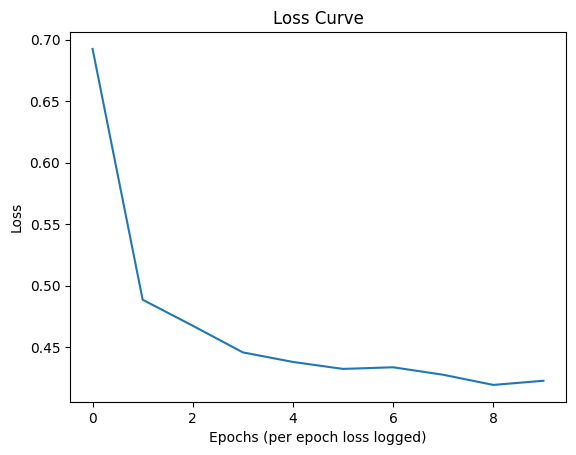

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import fashion_mnist

# ------------------ Activation Functions ------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - (np.tanh(z) ** 2)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# ------------------ Loss Function ------------------
def cross_entropy_loss(y, y_hat):
    return -np.sum(y * np.log(y_hat + 1e-9)) / y.shape[1]

# ------------------ Data Loading & Preprocessing ------------------
# Load Fashion-MNIST data and flatten images so each column is one example.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1).T / 255.0  # Shape: (784, m)
X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0
y_train_onehot = np.eye(10)[y_train].T  # Shape: (10, m)
y_test_onehot = np.eye(10)[y_test].T

# ------------------ Parameter Initialization ------------------
def initialize_parameters(layer_dims):
    np.random.seed(42)
    theta = {}
    for l in range(1, len(layer_dims)):
        theta[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        theta[f'b{l}'] = np.zeros((layer_dims[l], 1))
    return theta

# ------------------ Forward Propagation ------------------
def forward_propagation(X, theta):
    fpass = {}
    A = X
    L = len(theta) // 2
    for k in range(1, L):
        fpass[f'a{k}'] = np.dot(theta[f'W{k}'], A) + theta[f'b{k}']
        fpass[f'h{k}'] = sigmoid(fpass[f'a{k}'])
        A = fpass[f'h{k}']
    fpass[f'a{L}'] = np.dot(theta[f'W{L}'], A) + theta[f'b{L}']
    fpass['y_hat'] = softmax(fpass[f'a{L}'])
    return fpass

# ------------------ Backward Propagation ------------------
def backward_propagation(X, Y, theta, fpass):
    grads = {}
    L = len(theta) // 2
    m = X.shape[1]
    d_aL = fpass['y_hat'] - Y  # dZ for output layer

    for k in range(L, 0, -1):
        A_prev = X if k == 1 else fpass[f'h{k-1}']
        grads[f'W{k}'] = np.dot(d_aL, A_prev.T) / m
        grads[f'b{k}'] = np.sum(d_aL, axis=1, keepdims=True) / m
        if k > 1:
            d_h = np.dot(theta[f'W{k}'].T, d_aL)
            d_aL = d_h * sigmoid_derivative(fpass[f'a{k-1}'])
    return grads

# ------------------ Optimizer Functions ------------------
def sgd(theta, grads, learning_rate):
    for key in theta:
        theta[key] -= learning_rate * grads[key]
    return theta

def momentum(theta, grads, v, learning_rate, beta=0.9):
    for key in theta:
        v[key] = beta * v[key] + (1 - beta) * grads[key]
        theta[key] -= learning_rate * v[key]
    return theta, v

def nesterov(theta, grads, v, learning_rate, beta=0.9):
    for key in theta:
        v_prev = v[key].copy()
        v[key] = beta * v[key] + (1 - beta) * grads[key]
        theta[key] -= learning_rate * (beta * v_prev + (1 - beta) * grads[key])
    return theta, v

def rmsprop(theta, grads, s, learning_rate, beta=0.999, epsilon=1e-8):
    for key in theta:
        s[key] = beta * s[key] + (1 - beta) * np.square(grads[key])
        theta[key] -= learning_rate * grads[key] / (np.sqrt(s[key]) + epsilon)
    return theta, s

def adam(theta, grads, v, s, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for key in theta:
        v[key] = beta1 * v[key] + (1 - beta1) * grads[key]
        s[key] = beta2 * s[key] + (1 - beta2) * np.square(grads[key])
        v_corr = v[key] / (1 - beta1 ** t)
        s_corr = s[key] / (1 - beta2 ** t)
        theta[key] -= learning_rate * v_corr / (np.sqrt(s_corr) + epsilon)
    return theta, v, s

def nadam(theta, grads, v, s, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for key in theta:
        v_prev = v[key].copy()
        v[key] = beta1 * v[key] + (1 - beta1) * grads[key]
        s[key] = beta2 * s[key] + (1 - beta2) * np.square(grads[key])
        v_corr = v[key] / (1 - beta1 ** t)
        s_corr = s[key] / (1 - beta2 ** t)
        theta[key] -= learning_rate * ((beta1 * v_prev + (1 - beta1) * grads[key]) / (1 - beta1 ** t)) / (np.sqrt(s_corr) + epsilon)
    return theta, v, s

# ------------------ Training Loop with Batch Support ------------------
def optimize(X, Y, layer_dims, optimizer='sgd', learning_rate=0.01, epochs=100, batch_size=None):
    """
    If batch_size is None, full-batch GD is used.
    If batch_size == 1, stochastic GD is used.
    Otherwise, mini-batch GD is performed.
    """
    theta = initialize_parameters(layer_dims)
    # Initialize optimizer state for momentum, RMSprop, Adam, Nadam
    v = {key: np.zeros_like(val) for key, val in theta.items()}
    s = {key: np.zeros_like(val) for key, val in theta.items()}
    losses = []

    num_examples = X.shape[1]
    if batch_size is None:
        batch_size = num_examples  # Full-batch training

    steps_per_epoch = num_examples // batch_size
    if num_examples % batch_size != 0:
        steps_per_epoch += 1

    total_steps = 0
    for epoch in range(1, epochs + 1):
        # Shuffle training data each epoch
        permutation = np.random.permutation(num_examples)
        X_shuffled = X[:, permutation]
        Y_shuffled = Y[:, permutation]
        epoch_loss = 0

        for step in range(steps_per_epoch):
            start = step * batch_size
            end = min(start + batch_size, num_examples)
            X_batch = X_shuffled[:, start:end]
            Y_batch = Y_shuffled[:, start:end]

            fpass = forward_propagation(X_batch, theta)
            grads = backward_propagation(X_batch, Y_batch, theta, fpass)
            total_steps += 1

            if optimizer == 'sgd':
                theta = sgd(theta, grads, learning_rate)
            elif optimizer == 'momentum':
                theta, v = momentum(theta, grads, v, learning_rate)
            elif optimizer == 'nesterov':
                theta, v = nesterov(theta, grads, v, learning_rate)
            elif optimizer == 'rmsprop':
                theta, s = rmsprop(theta, grads, s, learning_rate)
            elif optimizer == 'adam':
                theta, v, s = adam(theta, grads, v, s, learning_rate, t=total_steps)
            elif optimizer == 'nadam':
                theta, v, s = nadam(theta, grads, v, s, learning_rate, t=total_steps)
            else:
                raise ValueError("Unknown optimizer type")

            batch_loss = cross_entropy_loss(Y_batch, fpass['y_hat'])
            epoch_loss += batch_loss

        epoch_loss /= steps_per_epoch
        losses.append(epoch_loss)
        print(f"Epoch {epoch}/{epochs}, Loss: {epoch_loss:.4f}")

    return theta, losses

# ------------------ Example Usage ------------------
layer_dims = [784, 128, 64, 10]
# Choose optimizer: 'sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', or 'nadam'
theta, losses = optimize(X_train, y_train_onehot, layer_dims, optimizer='adam', learning_rate=0.01, epochs=10, batch_size=32)

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs (per epoch loss logged)")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


 # Question 4,5,6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
from keras.datasets import fashion_mnist

class FeedForward:
    def __init__(self, config):
        self.config = config
        self.layer_dims = self._create_architecture()
        self.theta = self._initialize_parameters()
        self.optimizer_state = {}
        (self.X_train, self.y_train), (self.X_val, self.y_val) = self._load_and_split_data()
        self._prepare_test_data()
        self._initialize_optimizer()

    def _create_architecture(self):
        layer_dims = [784]  # Input layer
        layer_dims += [self.config.hidden_size] * self.config.num_layers
        layer_dims.append(10)  # Output layer
        return layer_dims

    def _initialize_parameters(self):
        np.random.seed(42)
        theta = {}
        for l in range(1, len(self.layer_dims)):
            prev_dim = self.layer_dims[l-1]
            curr_dim = self.layer_dims[l]

            if self.config.weight_init == 'xavier':
                scale = np.sqrt(2.0/(prev_dim + curr_dim)) if self.config.activation == 'relu' \
                    else np.sqrt(1.0/prev_dim)
            else:
                scale = 0.01

            theta[f'W{l}'] = np.random.randn(curr_dim, prev_dim) * scale
            theta[f'b{l}'] = np.zeros((curr_dim, 1))
        return theta

    def _load_and_split_data(self):
        (X_train_full, y_train_full), (_, _) = fashion_mnist.load_data()
        m = X_train_full.shape[0]
        split = int(m * 0.9)

        X_train = X_train_full[:split].reshape(split, -1).T / 255.0
        y_train = np.eye(10)[y_train_full[:split]].T
        X_val = X_train_full[split:].reshape(m-split, -1).T / 255.0
        y_val = np.eye(10)[y_train_full[split:]].T

        return (X_train, y_train), (X_val, y_val)

    def _prepare_test_data(self):
        (_, _), (X_test, y_test) = fashion_mnist.load_data()
        self.X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0
        self.y_test = np.eye(10)[y_test].T

    def _activation(self, z, derivative=False):
        if self.config.activation == 'sigmoid':
            return self._sigmoid(z, derivative)
        elif self.config.activation == 'tanh':
            return self._tanh(z, derivative)
        elif self.config.activation == 'relu':
            return self._relu(z, derivative)

    @staticmethod
    def _sigmoid(z, derivative=False):
        if derivative:
            return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def _tanh(z, derivative=False):
        if derivative:
            return 1 - z**2
        return np.tanh(z)

    @staticmethod
    def _relu(z, derivative=False):
        if derivative:
            return (z > 0).astype(float)
        return np.maximum(0, z)

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)

    def forward(self, X):
        fpass = {}
        A = X
        L = len(self.theta) // 2

        for l in range(1, L):
            fpass[f'a{l}'] = np.dot(self.theta[f'W{l}'], A) + self.theta[f'b{l}']
            fpass[f'h{l}'] = self._activation(fpass[f'a{l}'])
            A = fpass[f'h{l}']

        fpass[f'a{L}'] = np.dot(self.theta[f'W{L}'], A) + self.theta[f'b{L}']
        fpass['y_hat'] = self._softmax(fpass[f'a{L}'])
        return fpass

    def backward(self, X, Y, fpass):
        grads = {}
        L = len(self.theta) // 2
        m = X.shape[1]
        d_aL = fpass['y_hat'] - Y

        for l in range(L, 0, -1):
            A_prev = X if l == 1 else fpass[f'h{l-1}']
            grads[f'W{l}'] = np.dot(d_aL, A_prev.T)/m
            grads[f'b{l}'] = np.sum(d_aL, axis=1, keepdims=True)/m

            if self.config.weight_decay > 0:
                grads[f'W{l}'] += (self.config.weight_decay * self.theta[f'W{l}'])/m

            if l > 1:
                d_h = np.dot(self.theta[f'W{l}'].T, d_aL)
                d_aL = d_h * self._activation(fpass[f'h{l-1}'], derivative=True)

        return grads

    def compute_loss(self, y, y_hat):
        cross_entropy = -np.mean(np.sum(y * np.log(y_hat + 1e-9), axis=0))
        if self.config.weight_decay > 0:
            l2_penalty = sum(np.sum(np.square(w)) for w in self.theta.values() if w.ndim > 1)
            cross_entropy += (self.config.weight_decay * l2_penalty)/(2 * y.shape[1])
        return cross_entropy

    def _initialize_optimizer(self):
        opt = self.config.optimizer
        if opt in ['momentum', 'nesterov']:
            self.optimizer_state = {k: np.zeros_like(v) for k, v in self.theta.items()}
        elif opt in ['rmsprop']:
            self.optimizer_state = {k: np.zeros_like(v) for k, v in self.theta.items()}
        elif opt in ['adam', 'nadam']:
            self.optimizer_state = {
                'm': {k: np.zeros_like(v) for k, v in self.theta.items()},
                'v': {k: np.zeros_like(v) for k, v in self.theta.items()},
                't': 0
            }

    def _update_parameters(self, grads):
        opt = self.config.optimizer
        lr = self.config.lr
        beta = 0.9
        beta1, beta2 = 0.9, 0.999
        epsilon = 1e-8

        if opt == 'sgd':
            for key in self.theta:
                self.theta[key] -= lr * grads[key]

        elif opt in ['momentum', 'nesterov']:
            for key in self.theta:
                self.optimizer_state[key] = beta * self.optimizer_state[key] + (1 - beta) * grads[key]
                self.theta[key] -= lr * self.optimizer_state[key]

                if opt == 'nesterov':
                    self.theta[key] -= lr * beta * self.optimizer_state[key]

        elif opt == 'rmsprop':
            for key in self.theta:
                self.optimizer_state[key] = beta * self.optimizer_state[key] + (1 - beta) * np.square(grads[key])
                self.theta[key] -= lr * grads[key] / (np.sqrt(self.optimizer_state[key]) + epsilon)

        elif opt in ['adam', 'nadam']:
            self.optimizer_state['t'] += 1
            m = self.optimizer_state['m']
            v = self.optimizer_state['v']

            for key in self.theta:
                m[key] = beta1 * m[key] + (1 - beta1) * grads[key]
                v[key] = beta2 * v[key] + (1 - beta2) * np.square(grads[key])

                m_hat = m[key] / (1 - beta1**self.optimizer_state['t'])
                v_hat = v[key] / (1 - beta2**self.optimizer_state['t'])

                if opt == 'nadam':
                    m_hat = beta1 * m_hat + (1 - beta1) * grads[key]

                self.theta[key] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)

    def train(self):
        X, Y = self.X_train, self.y_train
        m = X.shape[1]
        batch_size = self.config.batch_size or m
        steps_per_epoch = m // batch_size

        for epoch in range(self.config.epochs):
            permutation = np.random.permutation(m)
            X_shuffled = X[:, permutation]
            Y_shuffled = Y[:, permutation]

            epoch_loss = 0
            for step in range(steps_per_epoch):
                start = step * batch_size
                end = start + batch_size
                X_batch = X_shuffled[:, start:end]
                Y_batch = Y_shuffled[:, start:end]

                fpass = self.forward(X_batch)
                grads = self.backward(X_batch, Y_batch, fpass)
                self._update_parameters(grads)

                epoch_loss += self.compute_loss(Y_batch, fpass['y_hat'])

            # Validation
            val_fpass = self.forward(self.X_val)
            val_loss = self.compute_loss(self.y_val, val_fpass['y_hat'])
            val_acc = self.accuracy(self.X_val, self.y_val)

            wandb.log({
                "epoch": epoch,
                "train_loss": epoch_loss/steps_per_epoch,
                "val_loss": val_loss,
                "val_acc": val_acc
            })

    def accuracy(self, X, y):
        fpass = self.forward(X)
        predictions = np.argmax(fpass['y_hat'], axis=0)
        labels = np.argmax(y, axis=0)
        return np.mean(predictions == labels)

def main():
    wandb.init( )
    config = wandb.config

    # Create meaningful run name
    wandb.run.name = (
        f"D4deben_hl{config.num_layers}_bs{config.batch_size}_"
        f"{config.activation[:3]}_lr{config.lr}_"
        f"{config.optimizer[:3]}_wd{config.weight_decay}"
    )

    model = FeedForward(config)
    model.train()

    test_acc = model.accuracy(model.X_test, model.y_test)
    wandb.log({"test_acc": test_acc})

# Sweep configuration
sweep_config = {
    'method': 'bayes',
    'metric': {'name': 'val_acc', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [5, 10]},
        'num_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'lr': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']}
    }
}

sweep_id = wandb.sweep(sweep_config, project="DL_A1")
wandb.agent(sweep_id, function=main, count=300)
wandb.finish()


 # Question 7

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
from keras.datasets import fashion_mnist
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

class FeedForward:
    def __init__(self, config):
        self.config = config
        self.layer_dims = self._create_architecture()
        self.theta = self._initialize_parameters()
        self.optimizer_state = {}
        (self.X_train, self.y_train), (self.X_val, self.y_val) = self._load_and_split_data()
        self._prepare_test_data()
        self._initialize_optimizer()

    def _create_architecture(self):
        layer_dims = [784]  # Input layer
        layer_dims += [self.config.hidden_size] * self.config.num_layers
        layer_dims.append(10)  # Output layer
        return layer_dims

    def _initialize_parameters(self):
        np.random.seed(42)
        theta = {}
        for l in range(1, len(self.layer_dims)):
            prev_dim = self.layer_dims[l-1]
            curr_dim = self.layer_dims[l]

            if self.config.weight_init == 'xavier':
                scale = np.sqrt(2.0/(prev_dim + curr_dim)) if self.config.activation == 'relu' \
                    else np.sqrt(1.0/prev_dim)
            else:
                scale = 0.01

            theta[f'W{l}'] = np.random.randn(curr_dim, prev_dim) * scale
            theta[f'b{l}'] = np.zeros((curr_dim, 1))
        return theta

    def _load_and_split_data(self):
        (X_train_full, y_train_full), (_, _) = fashion_mnist.load_data()
        m = X_train_full.shape[0]
        split = int(m * 0.9)

        X_train = X_train_full[:split].reshape(split, -1).T / 255.0
        y_train = np.eye(10)[y_train_full[:split]].T
        X_val = X_train_full[split:].reshape(m-split, -1).T / 255.0
        y_val = np.eye(10)[y_train_full[split:]].T

        return (X_train, y_train), (X_val, y_val)

    def _prepare_test_data(self):
        (_, _), (X_test, y_test) = fashion_mnist.load_data()
        self.X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0
        self.y_test = np.eye(10)[y_test].T

    def _activation(self, z, derivative=False):
        if self.config.activation == 'sigmoid':
            return self._sigmoid(z, derivative)
        elif self.config.activation == 'tanh':
            return self._tanh(z, derivative)
        elif self.config.activation == 'relu':
            return self._relu(z, derivative)

    @staticmethod
    def _sigmoid(z, derivative=False):
        if derivative:
            return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def _tanh(z, derivative=False):
        if derivative:
            return 1 - z**2
        return np.tanh(z)

    @staticmethod
    def _relu(z, derivative=False):
        if derivative:
            return (z > 0).astype(float)
        return np.maximum(0, z)

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)

    def forward(self, X):
        fpass = {}
        A = X
        L = len(self.theta) // 2

        for l in range(1, L):
            fpass[f'a{l}'] = np.dot(self.theta[f'W{l}'], A) + self.theta[f'b{l}']
            fpass[f'h{l}'] = self._activation(fpass[f'a{l}'])
            A = fpass[f'h{l}']

        fpass[f'a{L}'] = np.dot(self.theta[f'W{L}'], A) + self.theta[f'b{L}']
        fpass['y_hat'] = self._softmax(fpass[f'a{L}'])
        return fpass

    def backward(self, X, Y, fpass):
        grads = {}
        L = len(self.theta) // 2
        m = X.shape[1]
        d_aL = fpass['y_hat'] - Y

        for l in range(L, 0, -1):
            A_prev = X if l == 1 else fpass[f'h{l-1}']
            grads[f'W{l}'] = np.dot(d_aL, A_prev.T)/m
            grads[f'b{l}'] = np.sum(d_aL, axis=1, keepdims=True)/m

            if self.config.weight_decay > 0:
                grads[f'W{l}'] += (self.config.weight_decay * self.theta[f'W{l}'])/m

            if l > 1:
                d_h = np.dot(self.theta[f'W{l}'].T, d_aL)
                d_aL = d_h * self._activation(fpass[f'h{l-1}'], derivative=True)

        return grads

    def compute_loss(self, y, y_hat):
        cross_entropy = -np.mean(np.sum(y * np.log(y_hat + 1e-9), axis=0))
        if self.config.weight_decay > 0:
            l2_penalty = sum(np.sum(np.square(w)) for w in self.theta.values() if w.ndim > 1)
            cross_entropy += (self.config.weight_decay * l2_penalty)/(2 * y.shape[1])
        return cross_entropy

    def compute_squared_loss(self, y, y_hat):
        return np.mean(np.sum((y - y_hat)**2, axis=0))


    def _initialize_optimizer(self):
        opt = self.config.optimizer
        if opt in ['momentum', 'nesterov']:
            self.optimizer_state = {k: np.zeros_like(v) for k, v in self.theta.items()}
        elif opt in ['rmsprop']:
            self.optimizer_state = {k: np.zeros_like(v) for k, v in self.theta.items()}
        elif opt in ['adam', 'nadam']:
            self.optimizer_state = {
                'm': {k: np.zeros_like(v) for k, v in self.theta.items()},
                'v': {k: np.zeros_like(v) for k, v in self.theta.items()},
                't': 0
            }

    def _update_parameters(self, grads):
        opt = self.config.optimizer
        lr = self.config.lr
        beta = 0.9
        beta1, beta2 = 0.9, 0.999
        epsilon = 1e-8

        if opt == 'sgd':
            for key in self.theta:
                self.theta[key] -= lr * grads[key]

        elif opt in ['momentum', 'nesterov']:
            for key in self.theta:
                self.optimizer_state[key] = beta * self.optimizer_state[key] + (1 - beta) * grads[key]
                self.theta[key] -= lr * self.optimizer_state[key]

                if opt == 'nesterov':
                    self.theta[key] -= lr * beta * self.optimizer_state[key]

        elif opt == 'rmsprop':
            for key in self.theta:
                self.optimizer_state[key] = beta * self.optimizer_state[key] + (1 - beta) * np.square(grads[key])
                self.theta[key] -= lr * grads[key] / (np.sqrt(self.optimizer_state[key]) + epsilon)

        elif opt in ['adam', 'nadam']:
            self.optimizer_state['t'] += 1
            m = self.optimizer_state['m']
            v = self.optimizer_state['v']

            for key in self.theta:
                m[key] = beta1 * m[key] + (1 - beta1) * grads[key]
                v[key] = beta2 * v[key] + (1 - beta2) * np.square(grads[key])

                m_hat = m[key] / (1 - beta1**self.optimizer_state['t'])
                v_hat = v[key] / (1 - beta2**self.optimizer_state['t'])

                if opt == 'nadam':
                    m_hat = beta1 * m_hat + (1 - beta1) * grads[key]

                self.theta[key] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)

    def train(self):
        X, Y = self.X_train, self.y_train
        m = X.shape[1]
        batch_size = self.config.batch_size or m
        steps_per_epoch = m // batch_size

        for epoch in range(self.config.epochs):
            permutation = np.random.permutation(m)
            X_shuffled = X[:, permutation]
            Y_shuffled = Y[:, permutation]

            epoch_loss = 0
            for step in range(steps_per_epoch):
                start = step * batch_size
                end = start + batch_size
                X_batch = X_shuffled[:, start:end]
                Y_batch = Y_shuffled[:, start:end]

                fpass = self.forward(X_batch)
                grads = self.backward(X_batch, Y_batch, fpass)
                self._update_parameters(grads)

                epoch_loss += self.compute_loss(Y_batch, fpass['y_hat'])

            # Validation
            val_fpass = self.forward(self.X_val)
            val_loss = self.compute_loss(self.y_val, val_fpass['y_hat'])
            val_acc = self.accuracy(self.X_val, self.y_val)

            wandb.log({
                "epoch": epoch,
                "train_loss": epoch_loss/steps_per_epoch,
                "val_loss": val_loss,
                "val_acc": val_acc
            })

    def accuracy(self, X, y):
        fpass = self.forward(X)
        predictions = np.argmax(fpass['y_hat'], axis=0)
        labels = np.argmax(y, axis=0)
        return np.mean(predictions == labels)


    def compute_confusion_matrix(self, X, y):
      fpass = self.forward(X)
      predictions = np.argmax(fpass['y_hat'], axis=0)
      labels = np.argmax(y, axis=0)
      return wandb.plot.confusion_matrix(
          y_true=labels,
          preds=predictions,
          class_names=range(10)
      )




def main():
    wandb.init()
    config = wandb.config

    # Create meaningful run name
    wandb.run.name = (
        f"D4deb_hl{config.num_layers}_bs{config.batch_size}_"
        f"{config.activation[:3]}_lr{config.lr}_"
        f"{config.optimizer[:3]}_wd{config.weight_decay}"
    )

    model = FeedForward(config)
    model.train()

    test_acc = model.accuracy(model.X_test, model.y_test)
    confusion_matrix = model.compute_confusion_matrix(model.X_test, model.y_test)

    wandb.log({
        "test_acc": test_acc,
        "confusion_matrix": confusion_matrix,
    })

# Sweep configuration
sweep_config = {
    'method': 'bayes',
    'metric': {'name': 'val_acc', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [10]},
        'num_layers': {'values': [3]},
        'hidden_size': {'values': [128]},
        'weight_decay': {'values': [0.0005]},
        'lr': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['nadam']},
        'batch_size': {'values': [32]},
        'weight_init': {'values': [ 'xavier']},
        'activation': {'values': ['relu']}
    }
}

sweep_id = wandb.sweep(sweep_config, project="DL_A1")
wandb.agent(sweep_id, function=main, count=5)
wandb.finish()


Create sweep with ID: zkqjtswh
Sweep URL: https://wandb.ai/cs24m016-indian-institute-of-technology-madras/DL_A1/sweeps/zkqjtswh


wandb: Agent Starting Run: m7rgp7qp with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 9l9gcu24 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: j5a8ymwo with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: zj1m4k5y with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: vjmfmqpi with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


# Question 08

Create sweep with ID: yeb2vgol
Sweep URL: https://wandb.ai/cs24m016-indian-institute-of-technology-madras/DL_A1/sweeps/yeb2vgol


wandb: Agent Starting Run: tjudy0sa with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 1ph9ke5b with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: kfepoj6k with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: ucro4vwk with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: q79miqt1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


wandb: Agent Starting Run: s259q8zl with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


wandb: Agent Starting Run: sl7mmn2a with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


wandb: Agent Starting Run: 4ihdrtid with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 2gq31rwq with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


wandb: Agent Starting Run: 71rfk2c2 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: random


wandb: Agent Starting Run: 1fack349 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fa8xautm with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 2lhfq4ah with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: v9z5ef26 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: k7j8lv4s with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: icob4q49 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


wandb: Agent Starting Run: kg9muj91 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: d43ugaqc with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: xw5ug1ip with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: f5gdmvrh with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 8nqgsn42 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


<ipython-input-3-37d3b61dfdf1>:272: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


wandb: Agent Starting Run: 69fqcg6k with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 2hhkcu68 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 8jnna057 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: xmz1jf0f with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


wandb: Agent Starting Run: mw1q1671 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1lokgr50 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: p2u9vite with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: rag90sm0 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: somfnuh9 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: m5nblhfg with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	num_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: tgf8n113 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: xik2p9ri with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: qswxg4cf with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: i95956fl with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: x5gl853k with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: q2htw52f with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: krfoiv9n with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: adikqc3r with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: r9h4xvlq with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: grodzj2a with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: jjp7zxa4 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: qnhbwlgs with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: ejb6fo4j with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 4u28z76l with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: gciky4kl with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 18exwffa with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


wandb: Agent Starting Run: p2x2ajol with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: gl89ihtc with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: x8v9xtbg with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


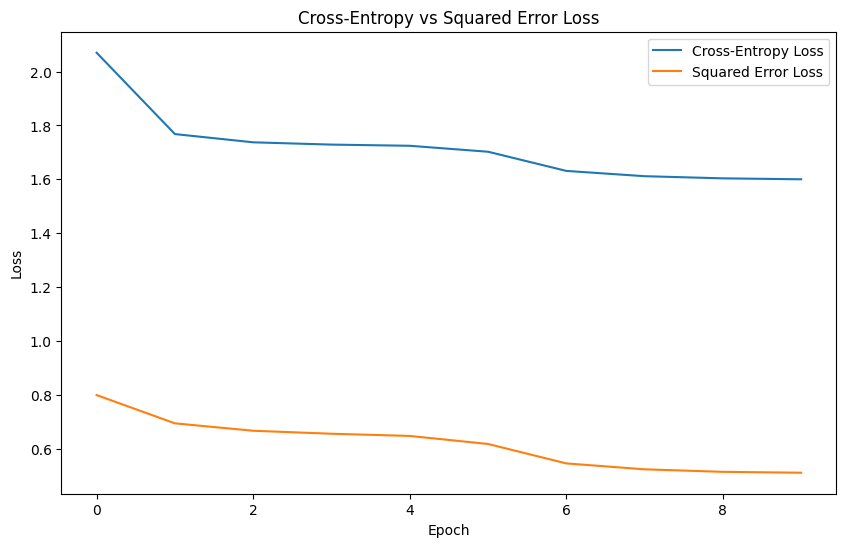

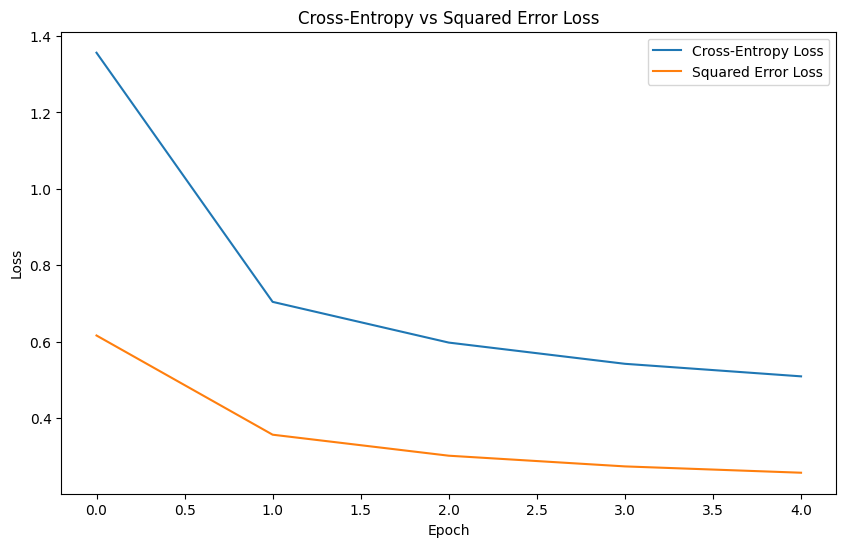

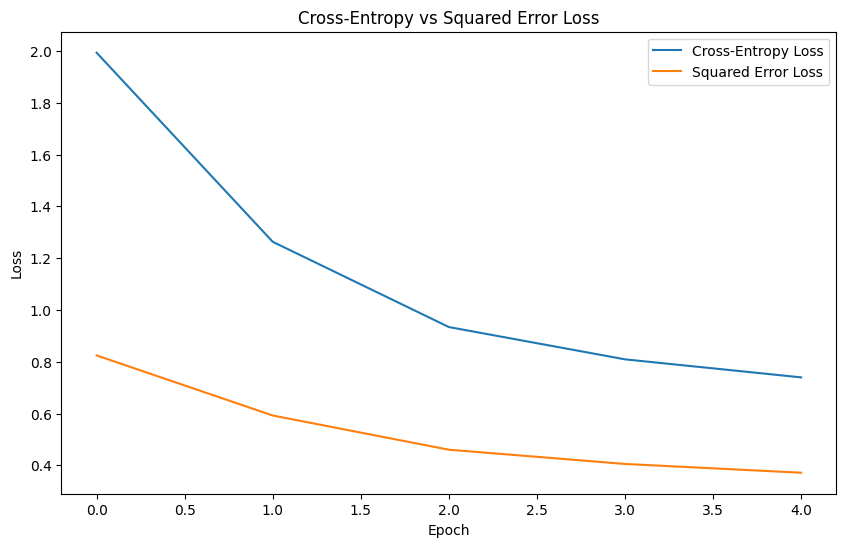

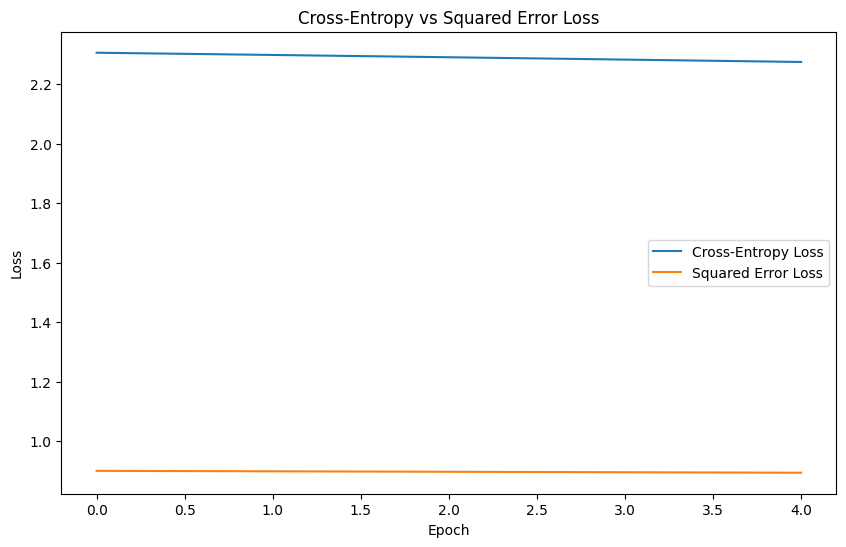

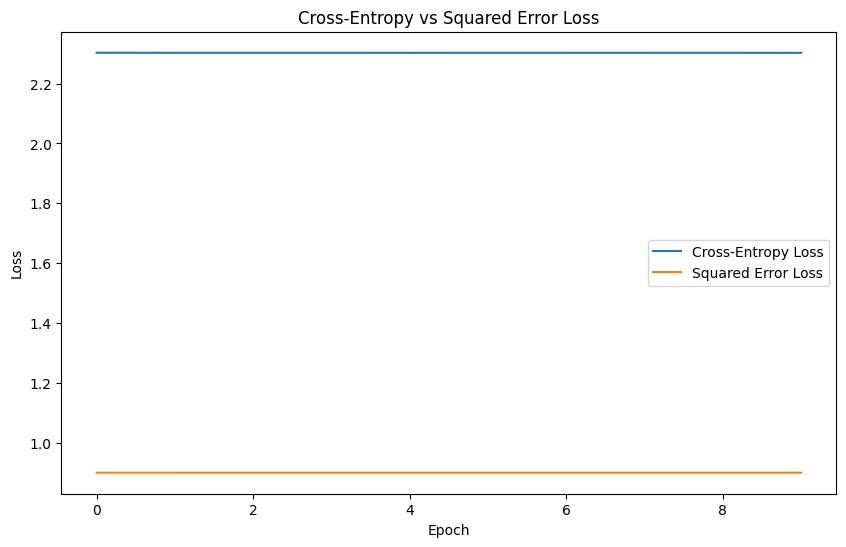

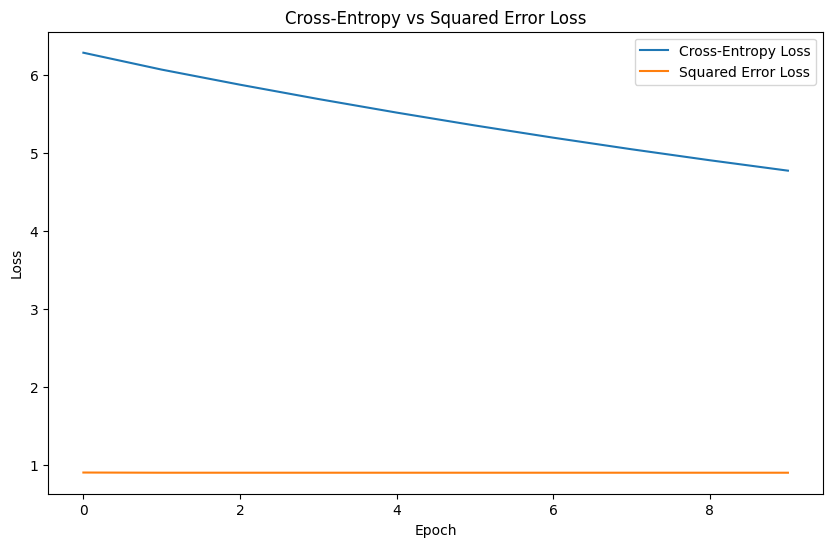

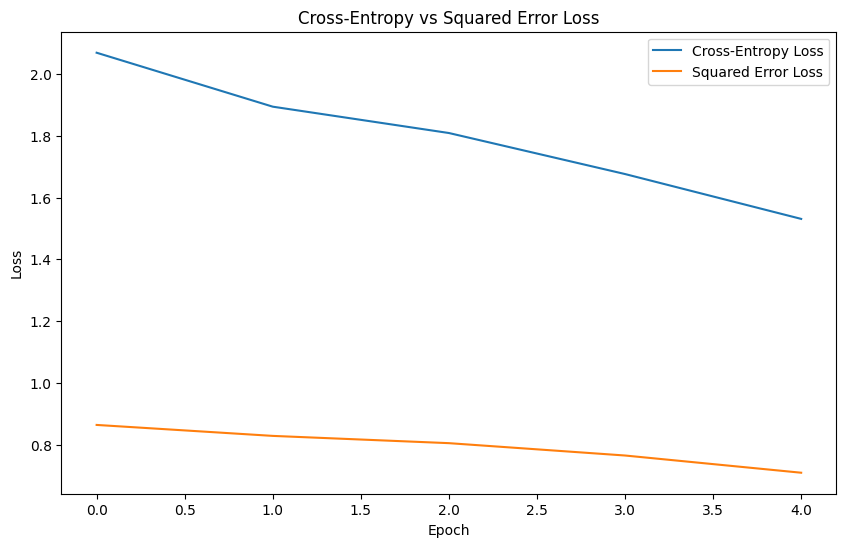

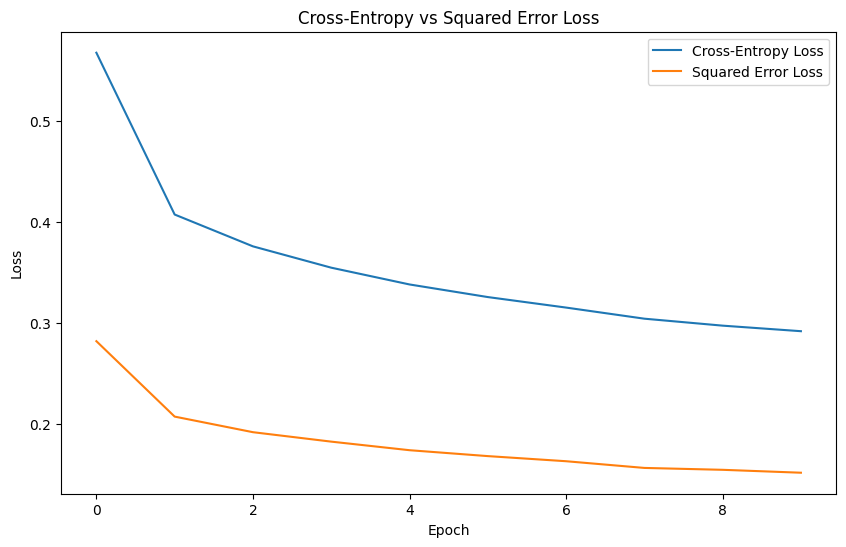

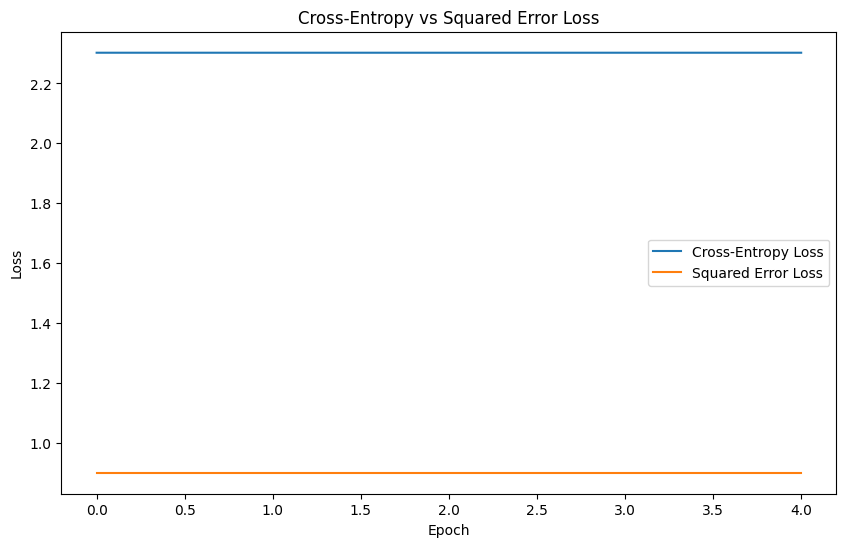

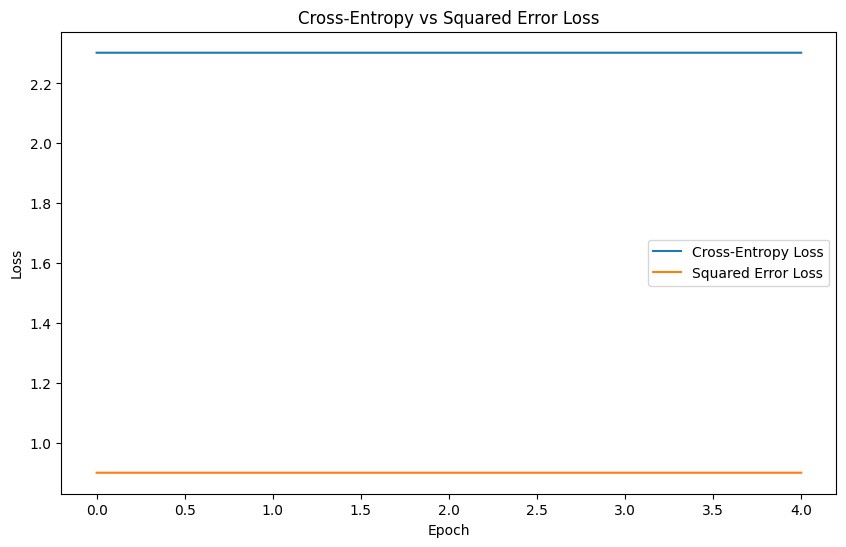

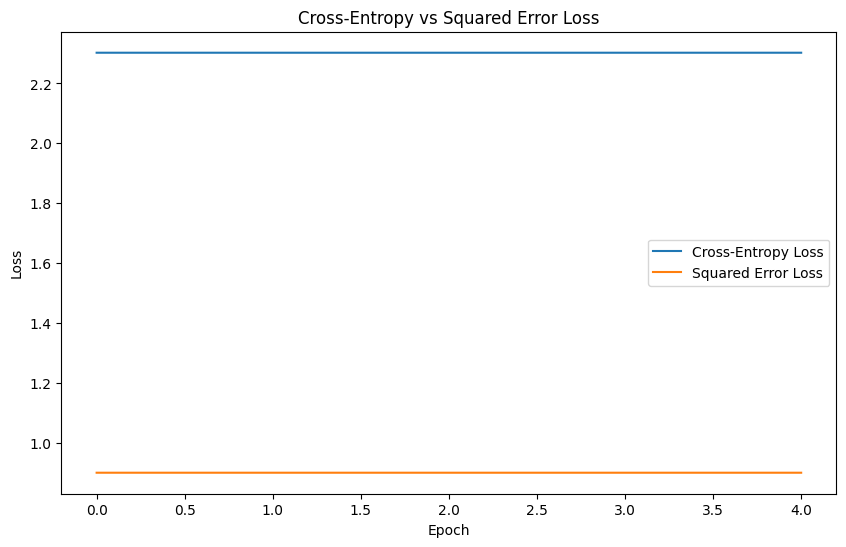

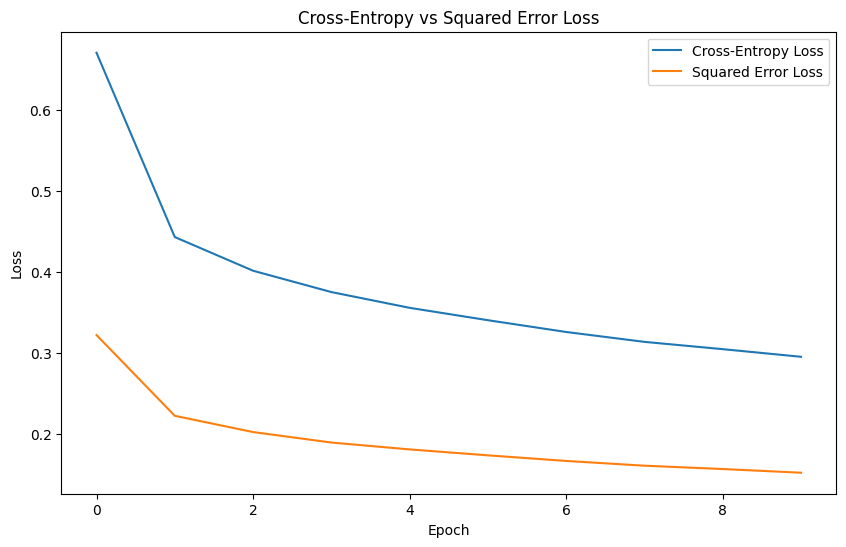

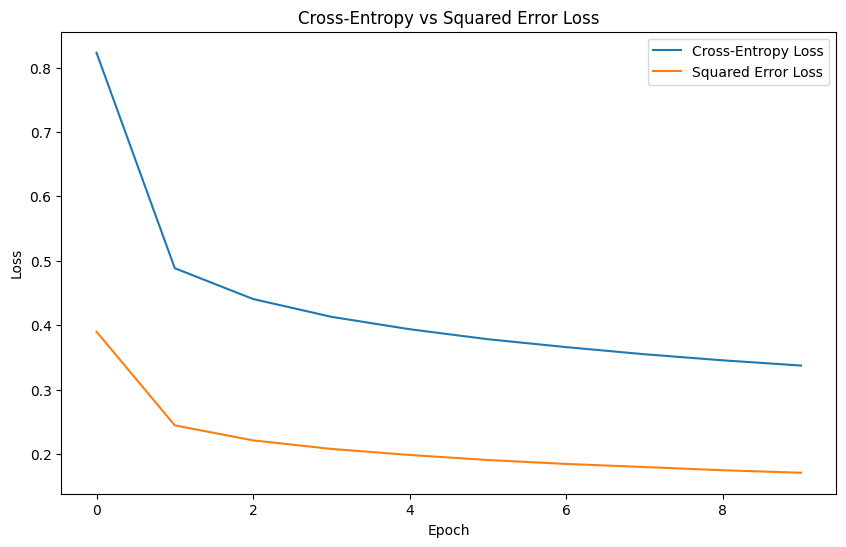

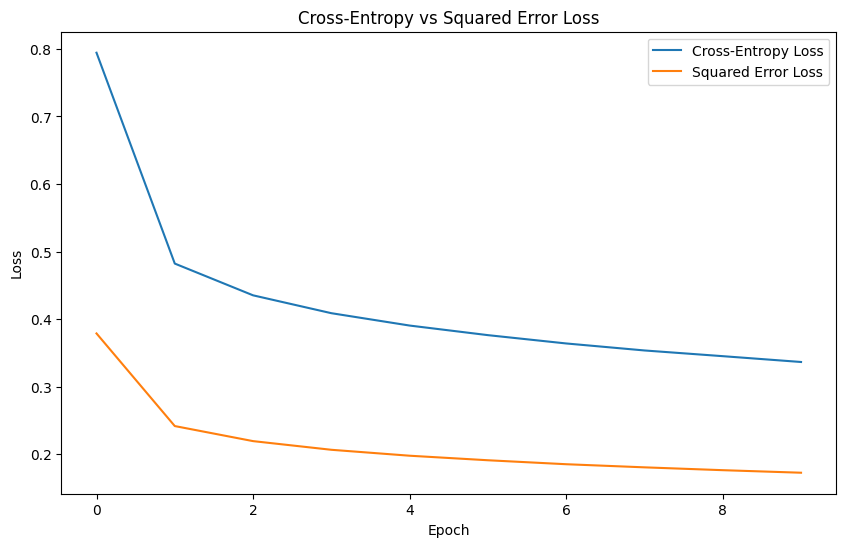

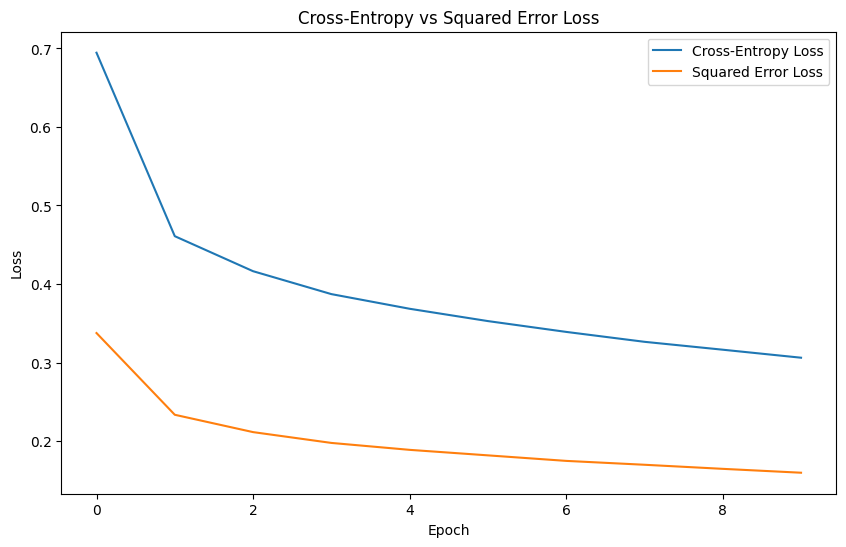

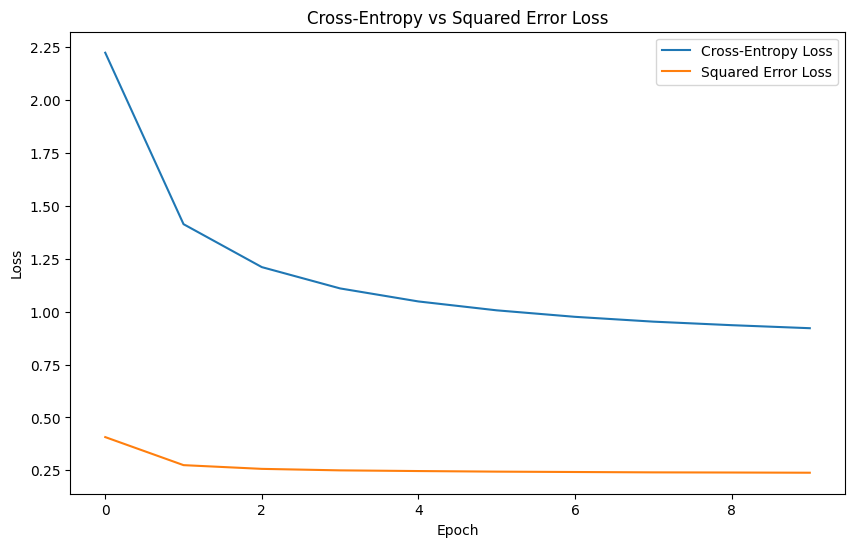

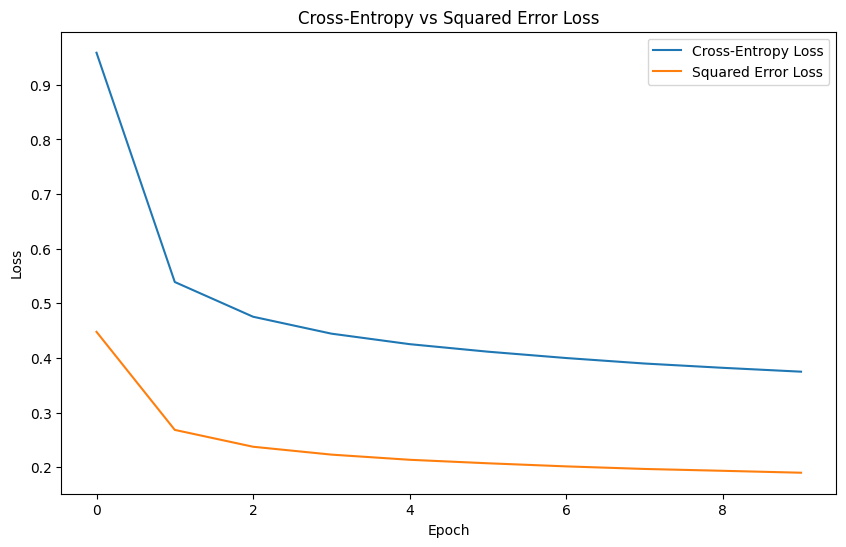

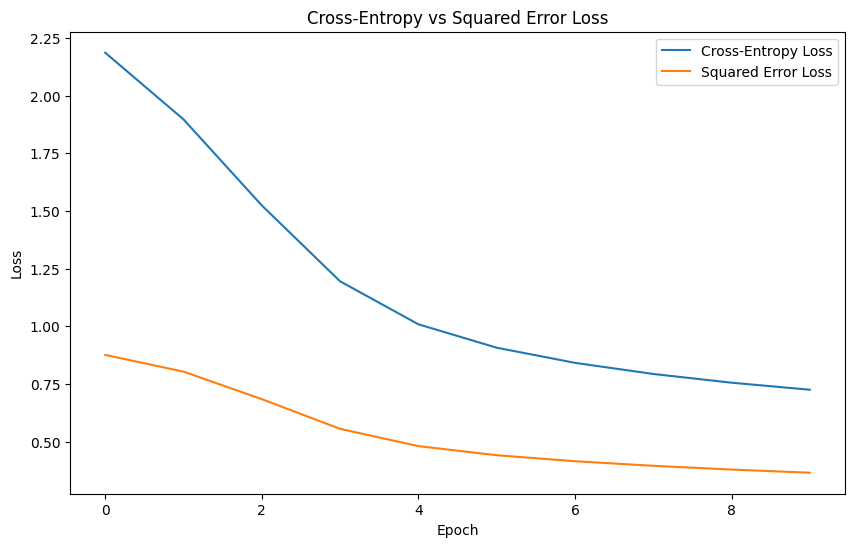

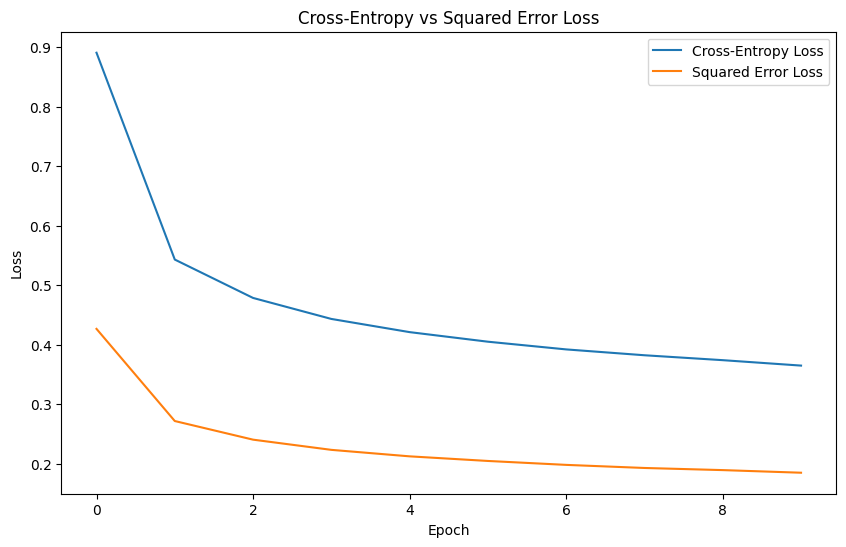

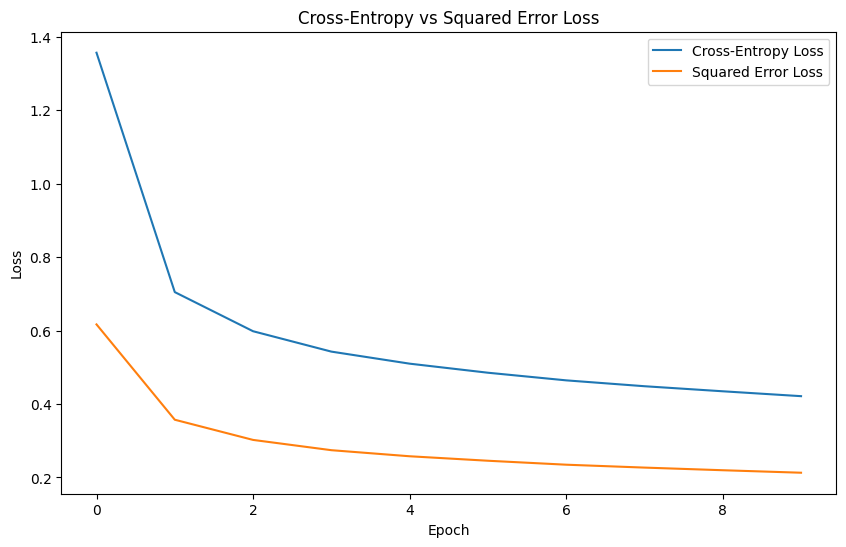

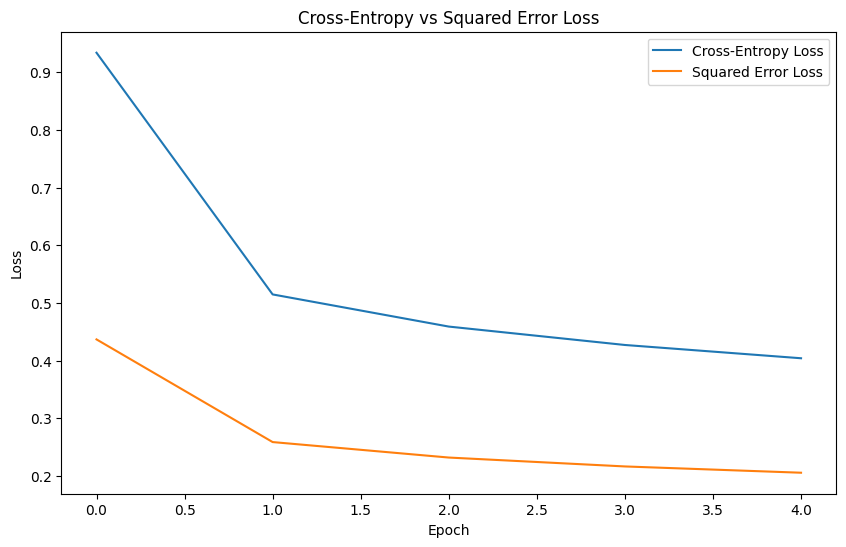

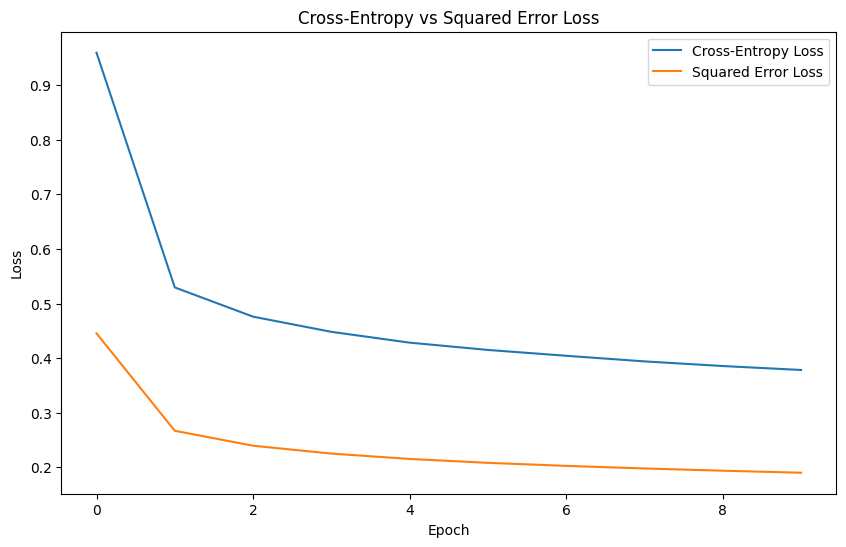

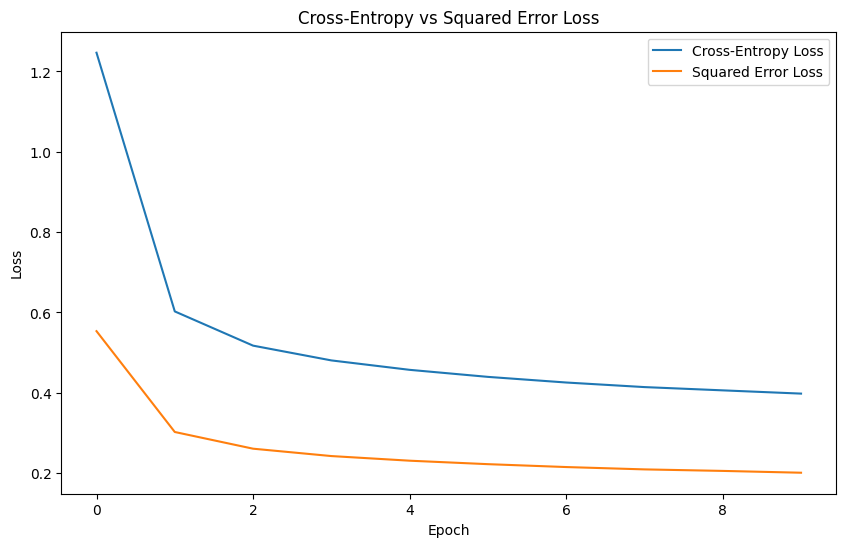

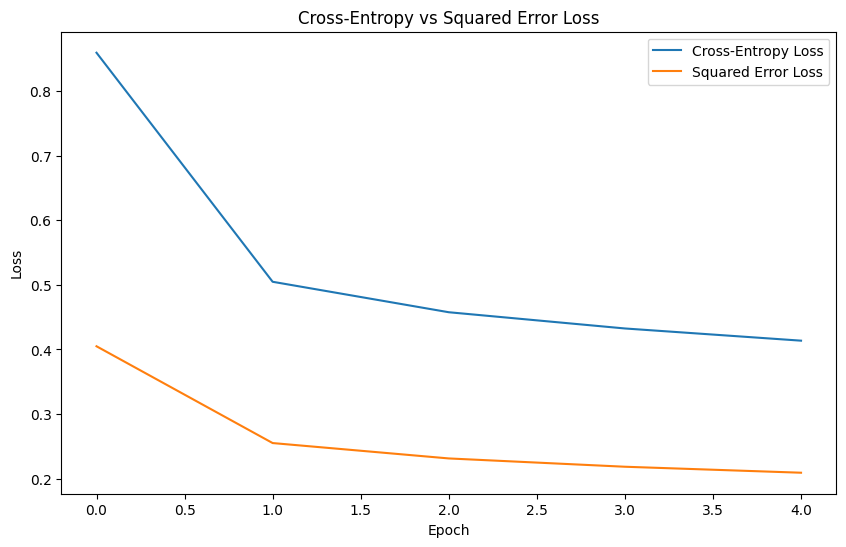

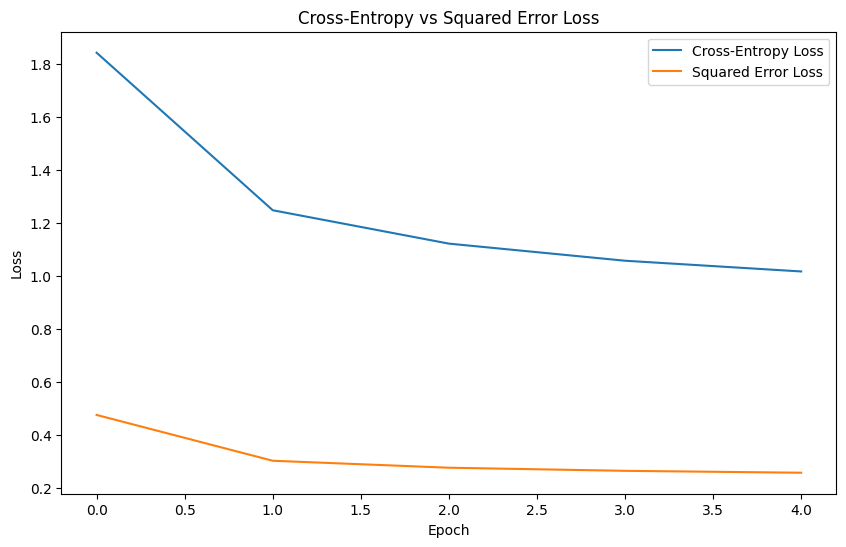

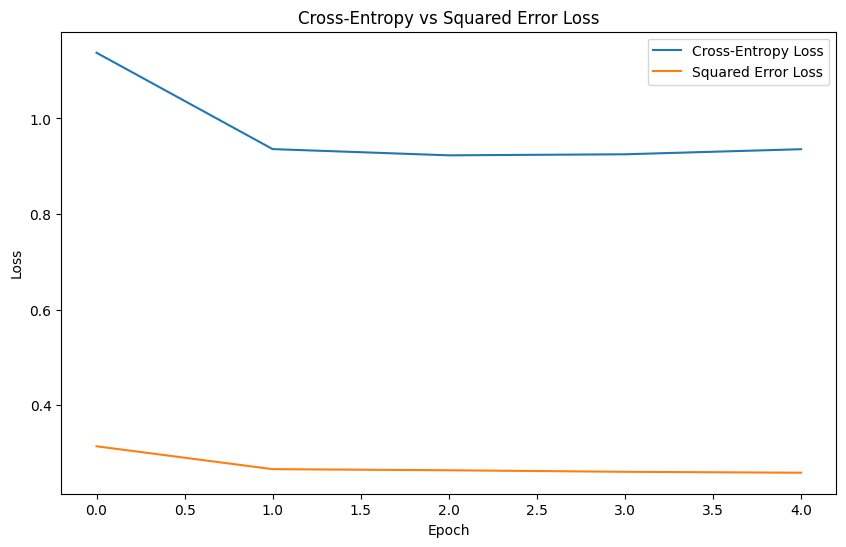

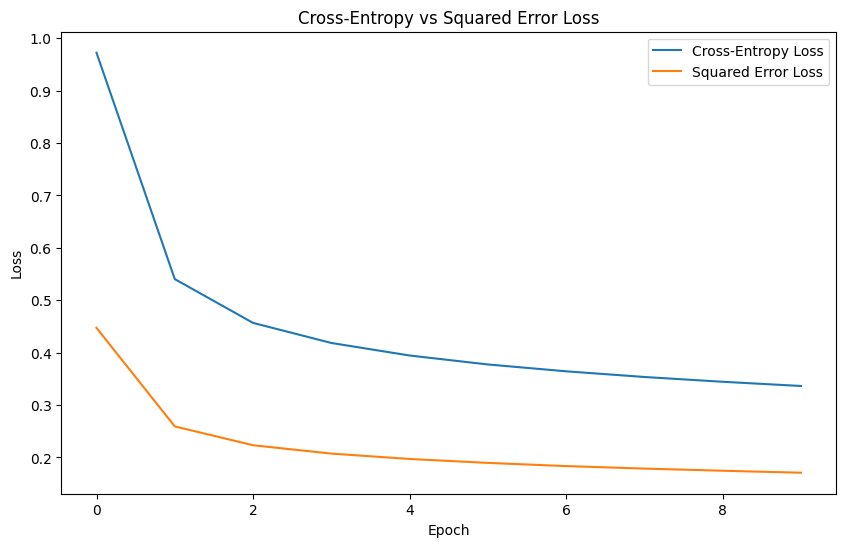

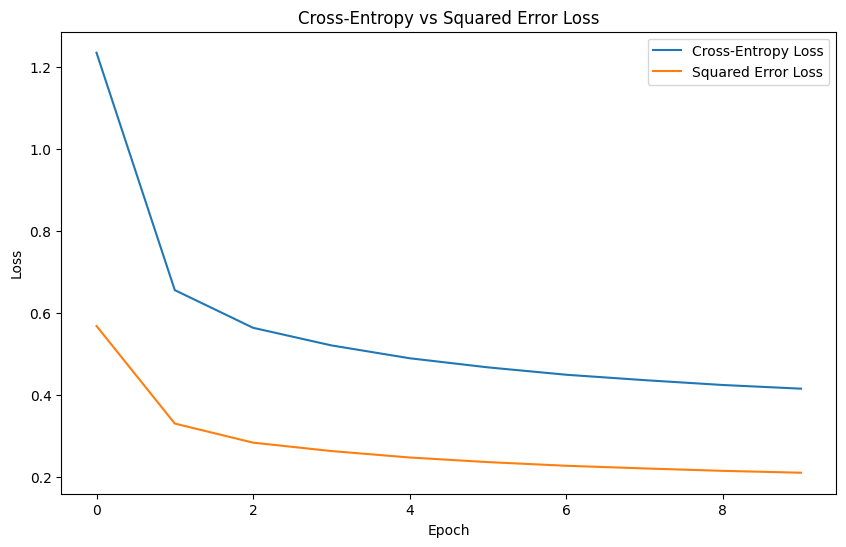

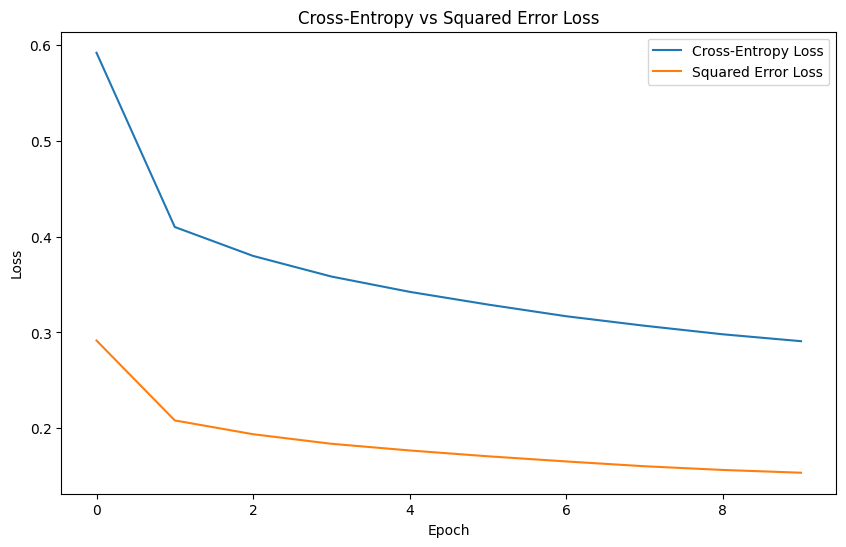

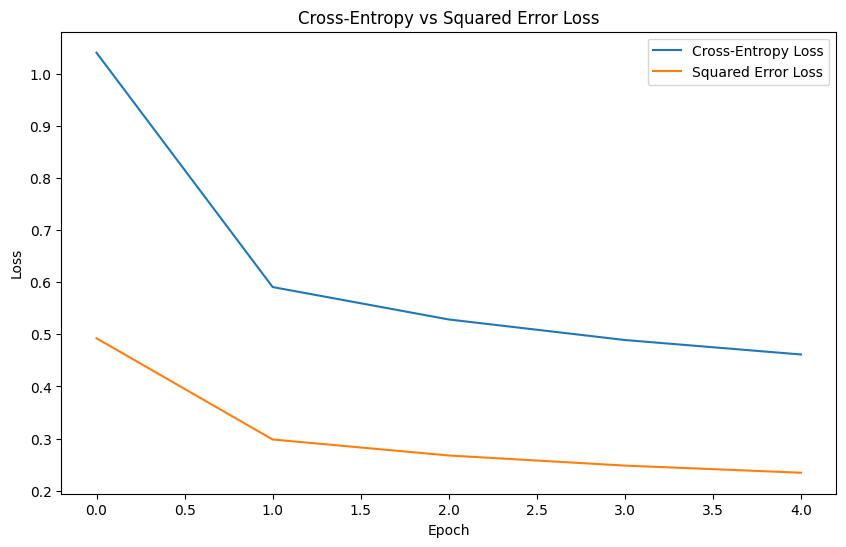

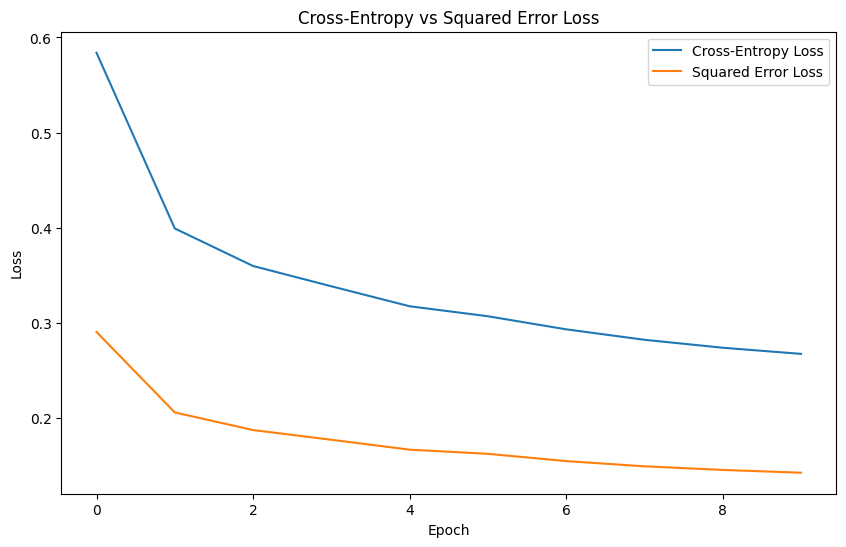

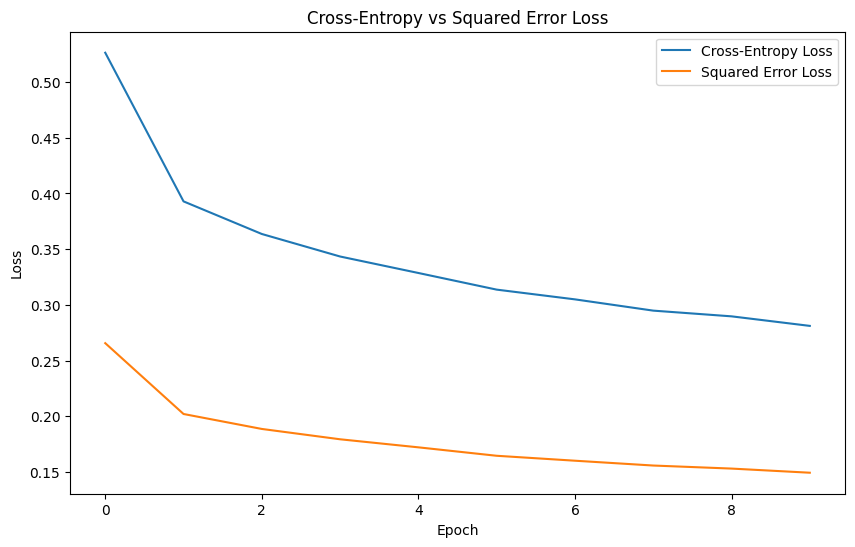

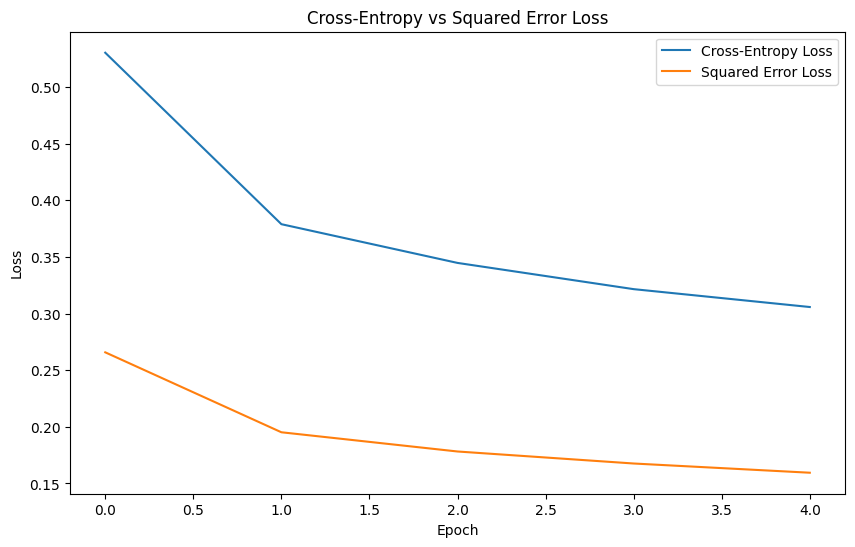

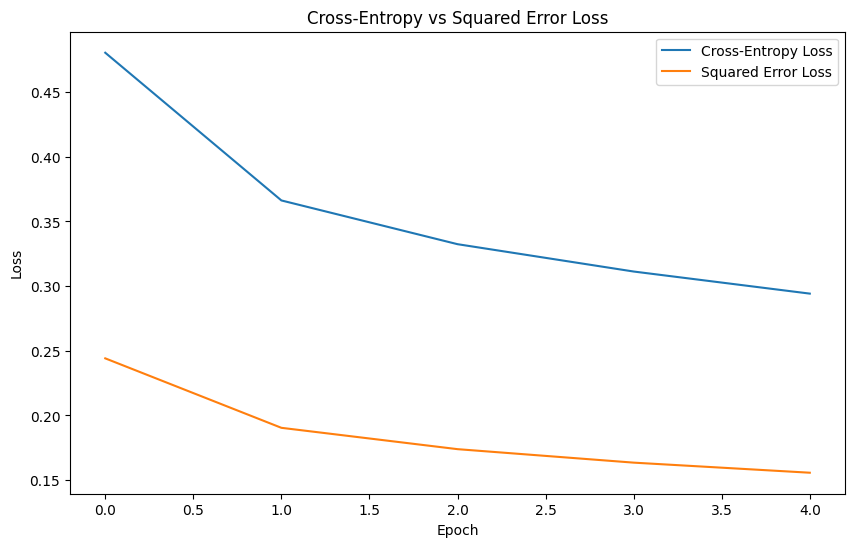

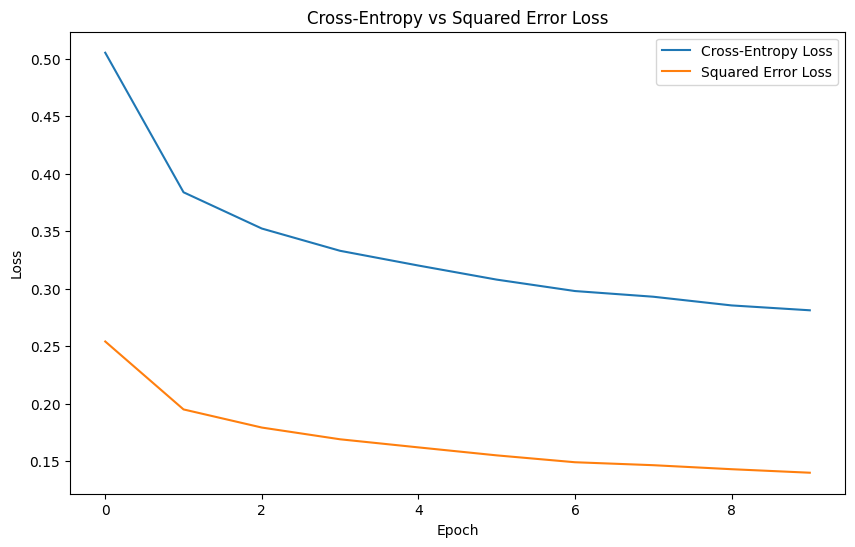

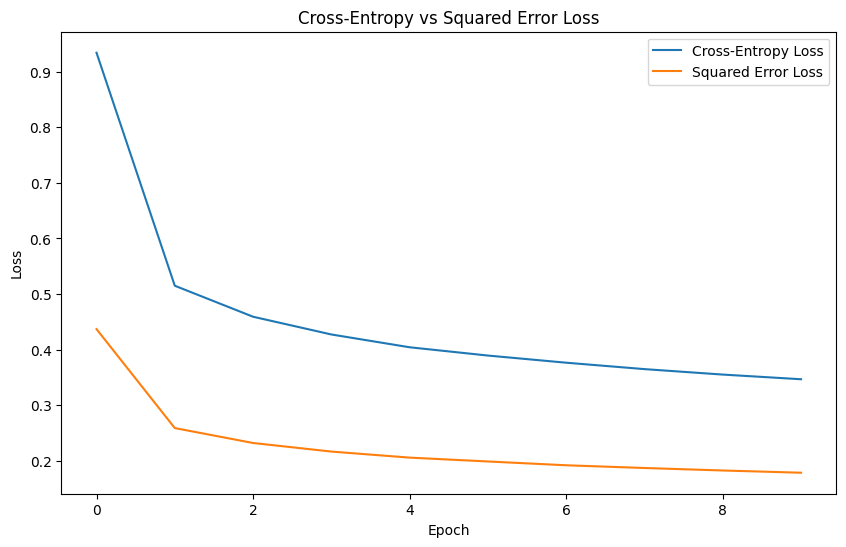

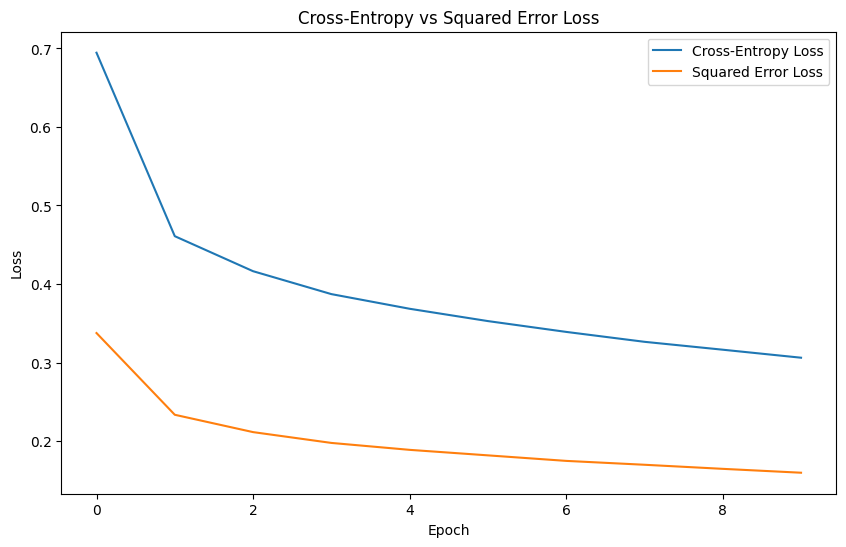

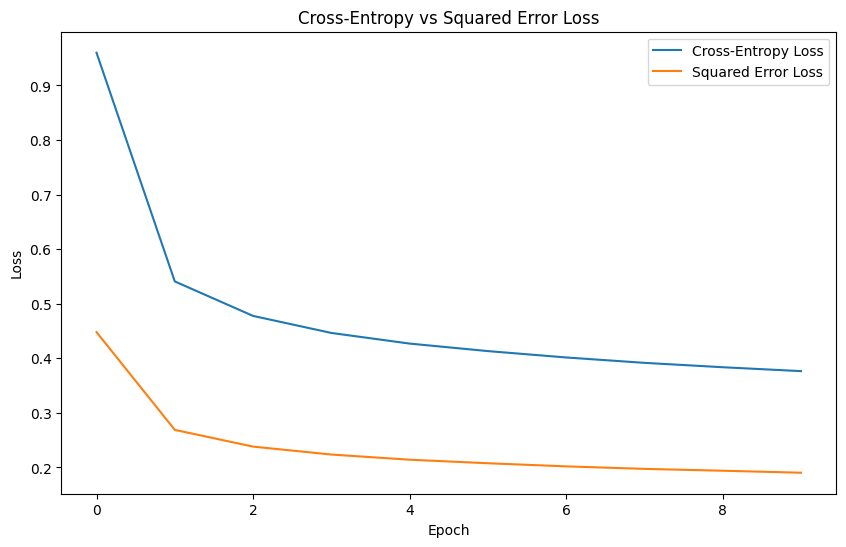

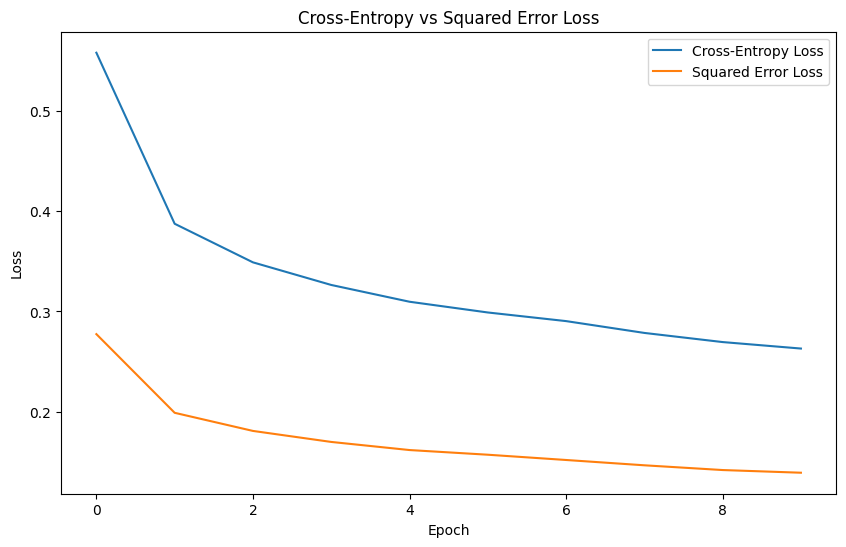

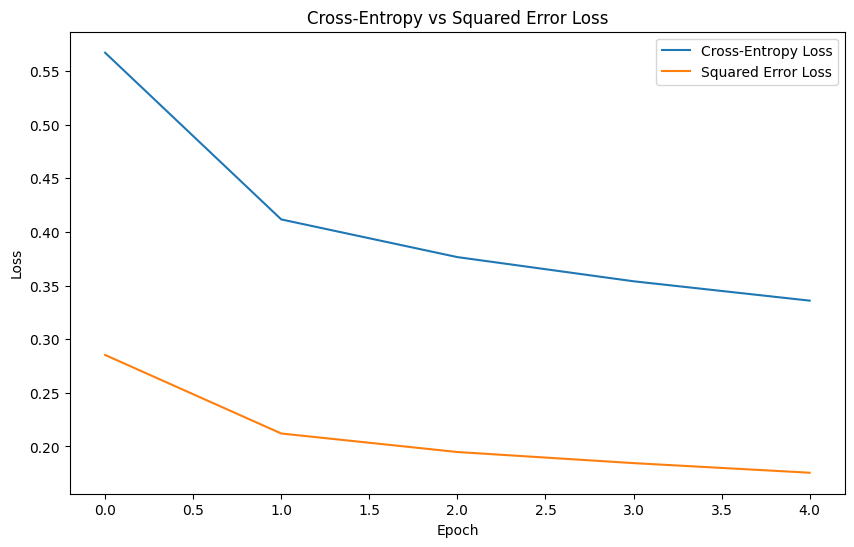

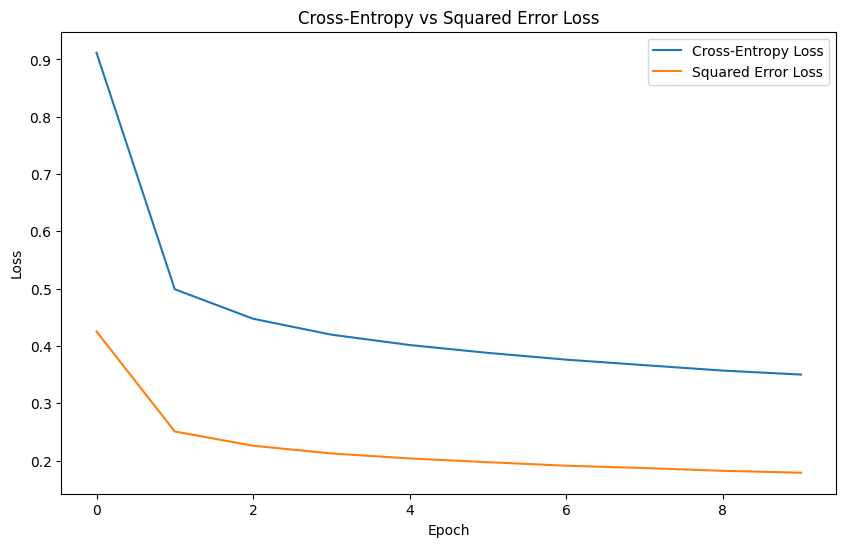

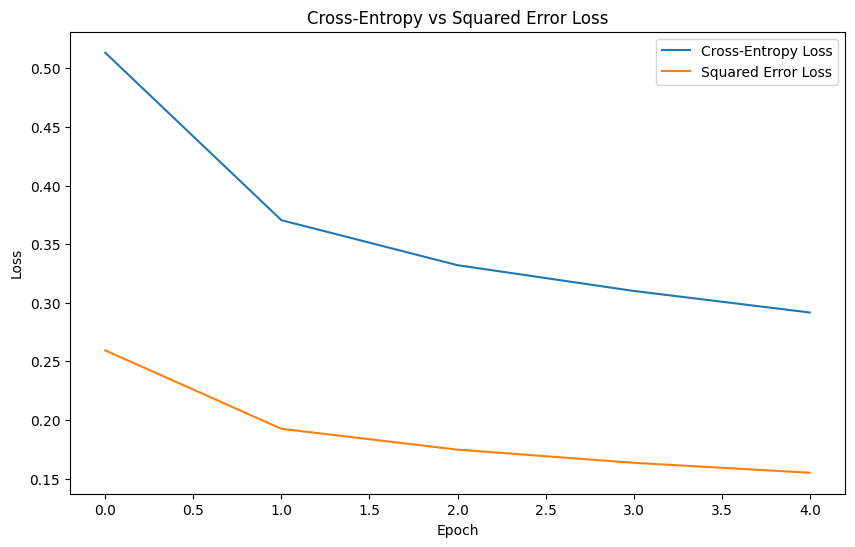

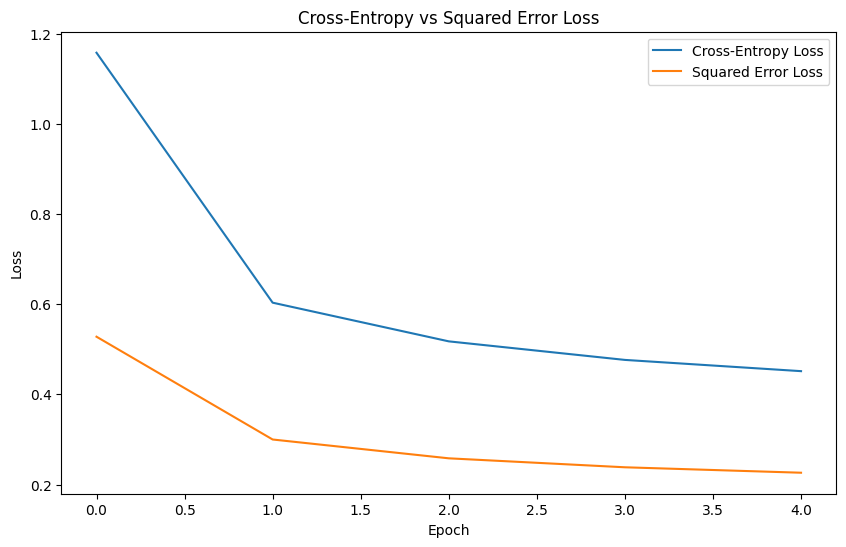

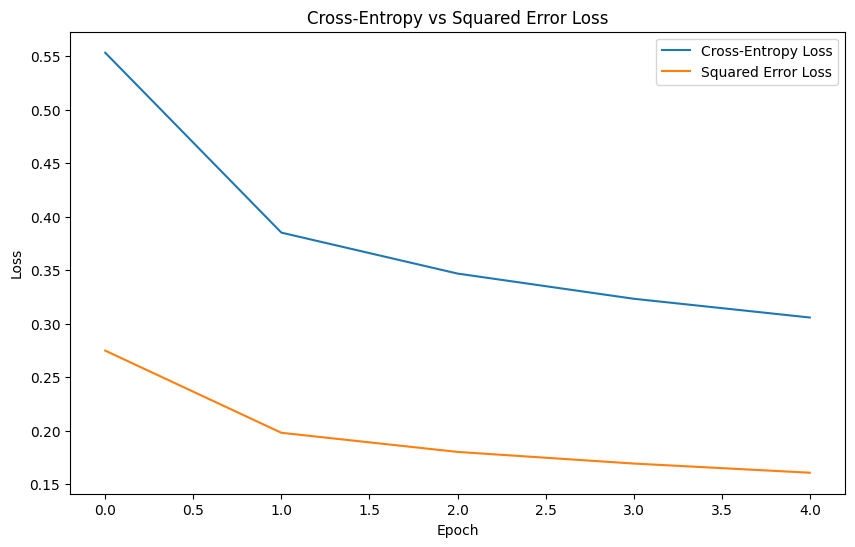

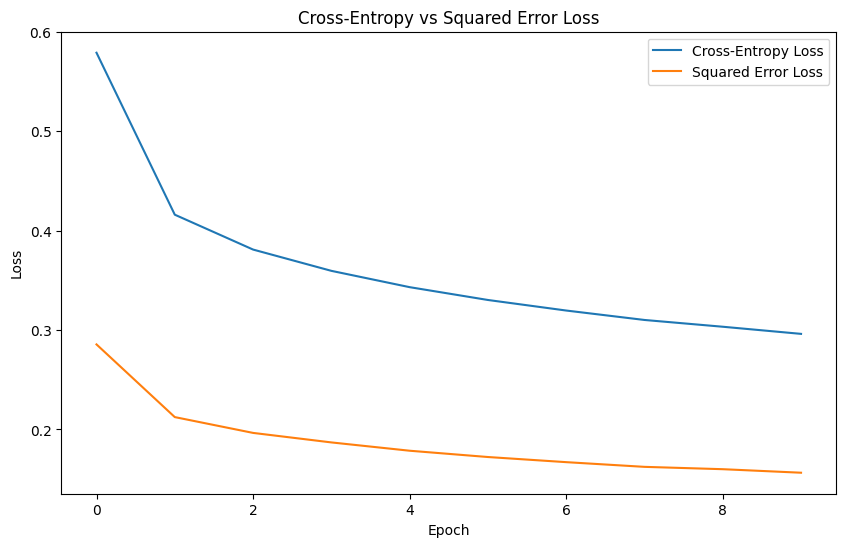

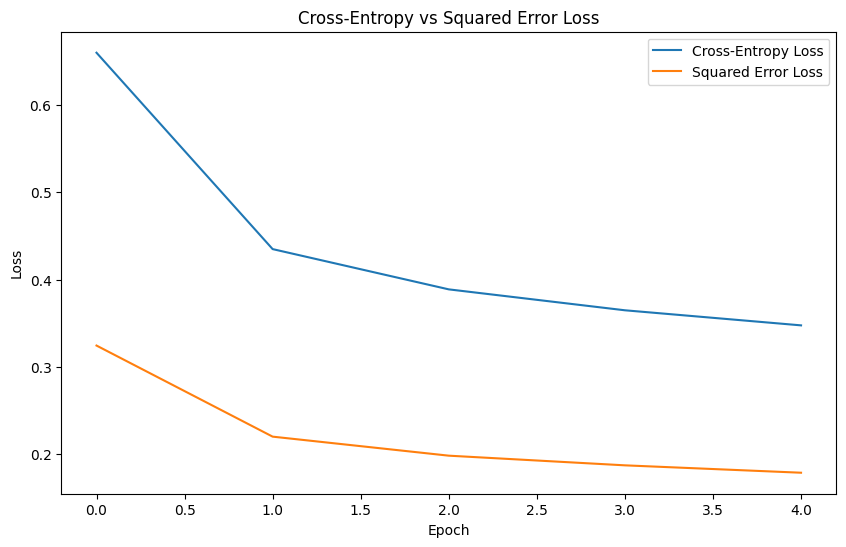

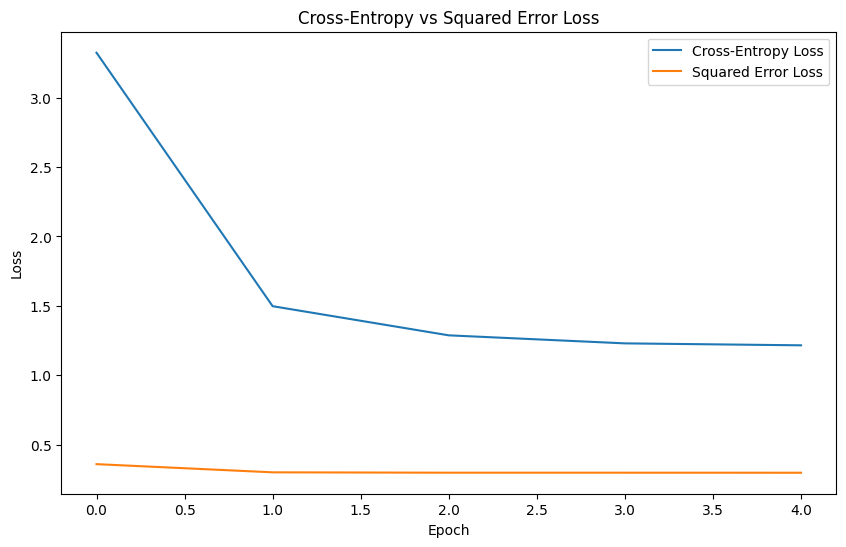

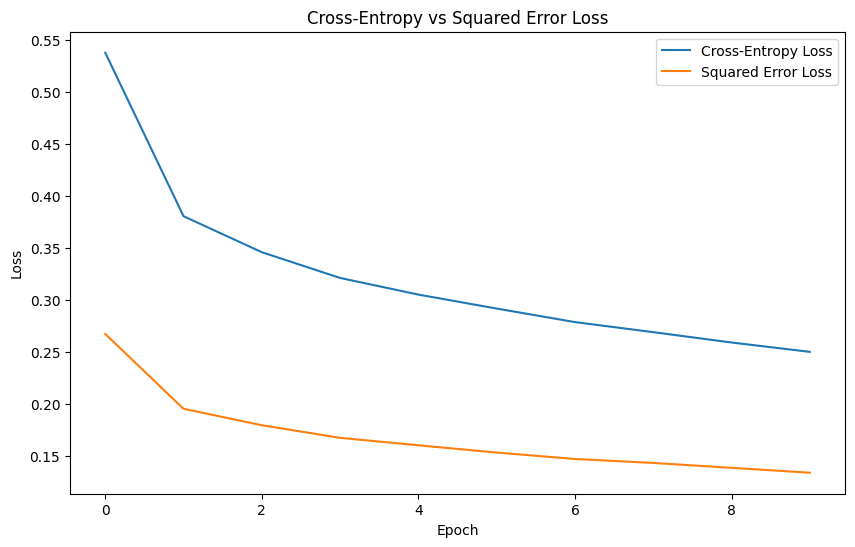

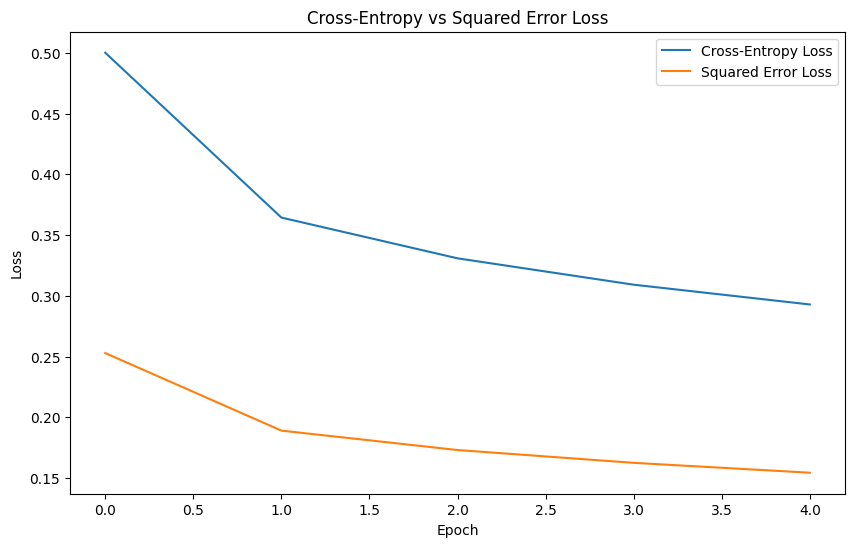

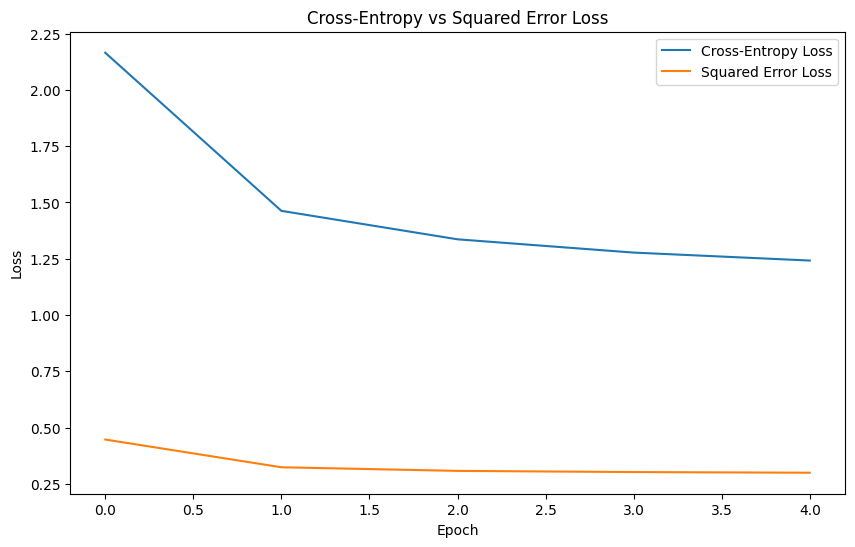

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
from keras.datasets import fashion_mnist
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

class FeedForward:
    def __init__(self, config):
        self.config = config
        self.layer_dims = self._create_architecture()
        self.theta = self._initialize_parameters()
        self.optimizer_state = {}
        (self.X_train, self.y_train), (self.X_val, self.y_val) = self._load_and_split_data()
        self._prepare_test_data()
        self._initialize_optimizer()

    def _create_architecture(self):
        layer_dims = [784]  # Input layer
        layer_dims += [self.config.hidden_size] * self.config.num_layers
        layer_dims.append(10)  # Output layer
        return layer_dims

    def _initialize_parameters(self):
        np.random.seed(42)
        theta = {}
        for l in range(1, len(self.layer_dims)):
            prev_dim = self.layer_dims[l-1]
            curr_dim = self.layer_dims[l]

            if self.config.weight_init == 'xavier':
                scale = np.sqrt(2.0/(prev_dim + curr_dim)) if self.config.activation == 'relu' \
                    else np.sqrt(1.0/prev_dim)
            else:
                scale = 0.01

            theta[f'W{l}'] = np.random.randn(curr_dim, prev_dim) * scale
            theta[f'b{l}'] = np.zeros((curr_dim, 1))
        return theta

    def _load_and_split_data(self):
        (X_train_full, y_train_full), (_, _) = fashion_mnist.load_data()
        m = X_train_full.shape[0]
        split = int(m * 0.9)

        X_train = X_train_full[:split].reshape(split, -1).T / 255.0
        y_train = np.eye(10)[y_train_full[:split]].T
        X_val = X_train_full[split:].reshape(m-split, -1).T / 255.0
        y_val = np.eye(10)[y_train_full[split:]].T

        return (X_train, y_train), (X_val, y_val)

    def _prepare_test_data(self):
        (_, _), (X_test, y_test) = fashion_mnist.load_data()
        self.X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0
        self.y_test = np.eye(10)[y_test].T

    def _activation(self, z, derivative=False):
        if self.config.activation == 'sigmoid':
            return self._sigmoid(z, derivative)
        elif self.config.activation == 'tanh':
            return self._tanh(z, derivative)
        elif self.config.activation == 'relu':
            return self._relu(z, derivative)

    @staticmethod
    def _sigmoid(z, derivative=False):
        if derivative:
            return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def _tanh(z, derivative=False):
        if derivative:
            return 1 - z**2
        return np.tanh(z)

    @staticmethod
    def _relu(z, derivative=False):
        if derivative:
            return (z > 0).astype(float)
        return np.maximum(0, z)

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)

    def forward(self, X):
        fpass = {}
        A = X
        L = len(self.theta) // 2

        for l in range(1, L):
            fpass[f'a{l}'] = np.dot(self.theta[f'W{l}'], A) + self.theta[f'b{l}']
            fpass[f'h{l}'] = self._activation(fpass[f'a{l}'])
            A = fpass[f'h{l}']

        fpass[f'a{L}'] = np.dot(self.theta[f'W{L}'], A) + self.theta[f'b{L}']
        fpass['y_hat'] = self._softmax(fpass[f'a{L}'])
        return fpass

    def backward(self, X, Y, fpass):
        grads = {}
        L = len(self.theta) // 2
        m = X.shape[1]
        d_aL = fpass['y_hat'] - Y

        for l in range(L, 0, -1):
            A_prev = X if l == 1 else fpass[f'h{l-1}']
            grads[f'W{l}'] = np.dot(d_aL, A_prev.T)/m
            grads[f'b{l}'] = np.sum(d_aL, axis=1, keepdims=True)/m

            if self.config.weight_decay > 0:
                grads[f'W{l}'] += (self.config.weight_decay * self.theta[f'W{l}'])/m

            if l > 1:
                d_h = np.dot(self.theta[f'W{l}'].T, d_aL)
                d_aL = d_h * self._activation(fpass[f'h{l-1}'], derivative=True)

        return grads

    def compute_loss(self, y, y_hat):
        cross_entropy = -np.mean(np.sum(y * np.log(y_hat + 1e-9), axis=0))
        if self.config.weight_decay > 0:
            l2_penalty = sum(np.sum(np.square(w)) for w in self.theta.values() if w.ndim > 1)
            cross_entropy += (self.config.weight_decay * l2_penalty)/(2 * y.shape[1])
        return cross_entropy

    def compute_squared_loss(self, y, y_hat):
        return np.mean(np.sum((y - y_hat)**2, axis=0))


    def _initialize_optimizer(self):
        opt = self.config.optimizer
        if opt in ['momentum', 'nesterov']:
            self.optimizer_state = {k: np.zeros_like(v) for k, v in self.theta.items()}
        elif opt in ['rmsprop']:
            self.optimizer_state = {k: np.zeros_like(v) for k, v in self.theta.items()}
        elif opt in ['adam', 'nadam']:
            self.optimizer_state = {
                'm': {k: np.zeros_like(v) for k, v in self.theta.items()},
                'v': {k: np.zeros_like(v) for k, v in self.theta.items()},
                't': 0
            }

    def _update_parameters(self, grads):
        opt = self.config.optimizer
        lr = self.config.lr
        beta = 0.9
        beta1, beta2 = 0.9, 0.999
        epsilon = 1e-8

        if opt == 'sgd':
            for key in self.theta:
                self.theta[key] -= lr * grads[key]

        elif opt in ['momentum', 'nesterov']:
            for key in self.theta:
                self.optimizer_state[key] = beta * self.optimizer_state[key] + (1 - beta) * grads[key]
                self.theta[key] -= lr * self.optimizer_state[key]

                if opt == 'nesterov':
                    self.theta[key] -= lr * beta * self.optimizer_state[key]

        elif opt == 'rmsprop':
            for key in self.theta:
                self.optimizer_state[key] = beta * self.optimizer_state[key] + (1 - beta) * np.square(grads[key])
                self.theta[key] -= lr * grads[key] / (np.sqrt(self.optimizer_state[key]) + epsilon)

        elif opt in ['adam', 'nadam']:
            self.optimizer_state['t'] += 1
            m = self.optimizer_state['m']
            v = self.optimizer_state['v']

            for key in self.theta:
                m[key] = beta1 * m[key] + (1 - beta1) * grads[key]
                v[key] = beta2 * v[key] + (1 - beta2) * np.square(grads[key])

                m_hat = m[key] / (1 - beta1**self.optimizer_state['t'])
                v_hat = v[key] / (1 - beta2**self.optimizer_state['t'])

                if opt == 'nadam':
                    m_hat = beta1 * m_hat + (1 - beta1) * grads[key]

                self.theta[key] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)

    def train(self):
        X, Y = self.X_train, self.y_train
        m = X.shape[1]
        batch_size = self.config.batch_size or m
        steps_per_epoch = m // batch_size

        cross_entropy_losses = []
        squared_losses = []

        for epoch in range(self.config.epochs):
            permutation = np.random.permutation(m)
            X_shuffled = X[:, permutation]
            Y_shuffled = Y[:, permutation]

            epoch_cross_entropy_loss = 0
            epoch_squared_loss = 0

            for step in range(steps_per_epoch):
                start = step * batch_size
                end = start + batch_size
                X_batch = X_shuffled[:, start:end]
                Y_batch = Y_shuffled[:, start:end]

                fpass = self.forward(X_batch)
                grads = self.backward(X_batch, Y_batch, fpass)
                self._update_parameters(grads)

                epoch_cross_entropy_loss += self.compute_loss(Y_batch, fpass['y_hat'])
                epoch_squared_loss += self.compute_squared_loss(Y_batch, fpass['y_hat'])

            cross_entropy_losses.append(epoch_cross_entropy_loss / steps_per_epoch)
            squared_losses.append(epoch_squared_loss / steps_per_epoch)

            # Validation
            val_fpass = self.forward(self.X_val)
            val_cross_entropy = self.compute_loss(self.y_val, val_fpass['y_hat'])
            val_squared_loss = self.compute_squared_loss(self.y_val, val_fpass['y_hat'])
            val_acc = self.accuracy(self.X_val, self.y_val)

            wandb.log({
                "epoch": epoch,
                "train_cross_entropy": cross_entropy_losses[-1],
                "train_squared_loss": squared_losses[-1],
                "val_cross_entropy": val_cross_entropy,
                "val_squared_loss": val_squared_loss,
                "val_acc": val_acc
            })

        return cross_entropy_losses, squared_losses


    def accuracy(self, X, y):
        fpass = self.forward(X)
        predictions = np.argmax(fpass['y_hat'], axis=0)
        labels = np.argmax(y, axis=0)
        return np.mean(predictions == labels)


    def compute_confusion_matrix(self, X, y):
      fpass = self.forward(X)
      predictions = np.argmax(fpass['y_hat'], axis=0)
      labels = np.argmax(y, axis=0)
      return wandb.plot.confusion_matrix(
          y_true=labels,
          preds=predictions,
          class_names=range(10)
      )




def main():
    wandb.init()
    config = wandb.config

    wandb.run.name = (
        f"D4deb_hl{config.num_layers}_bs{config.batch_size}_"
        f"{config.activation[:3]}_lr{config.lr}_"
        f"{config.optimizer[:3]}_wd{config.weight_decay}"
    )

    model = FeedForward(config)
    cross_entropy_losses, squared_losses = model.train()

    # Generate comparison plot
    plt.figure(figsize=(10, 6))
    plt.plot(cross_entropy_losses, label='Cross-Entropy Loss')
    plt.plot(squared_losses, label='Squared Error Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Cross-Entropy vs Squared Error Loss')
    plt.legend()

    # Log the plot to wandb
    wandb.log({"loss_comparison": wandb.Image(plt)})

    test_acc = model.accuracy(model.X_test, model.y_test)
    confusion_matrix = model.compute_confusion_matrix(model.X_test, model.y_test)

    wandb.log({
        "test_acc": test_acc,
        "confusion_matrix": confusion_matrix,
    })


# Sweep configuration
sweep_config = {
    'method': 'bayes',
    'metric': {'name': 'val_acc', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [5, 10]},
        'num_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'lr': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']}
    }
}

sweep_id = wandb.sweep(sweep_config, project="DL_A1")
wandb.agent(sweep_id, function=main, count=50)
wandb.finish()


#Question 10

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: od6musz1
Sweep URL: https://wandb.ai/cs24m016-indian-institute-of-technology-madras/DL_A1/sweeps/od6musz1


wandb: Agent Starting Run: tita4btf with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier
wandb: Currently logged in as: cs24m016 (cs24m016-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


wandb: Agent Starting Run: jjhqw1sl with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


wandb: Agent Starting Run: f2r08lue with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


wandb: Agent Starting Run: e8mtmay2 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 72kb5dep with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: bt1elfh1 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: yac8cjbw with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


wandb: Agent Starting Run: j1yhwvl4 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8p033a0h with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: grujx41i with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


wandb: Agent Starting Run: 01byuzdm with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: c1dbbqxg with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 2rdkkrmt with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: sow1dxgu with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 8nqo0tp0 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: mloehnvk with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: je2m14v2 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: quwvlsc1 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nwn9k964 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: 44lkg37x with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: adv3of81 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


<ipython-input-1-342bb605728c>:272: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


wandb: Agent Starting Run: mrzjffcy with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: althdkkd with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: s96xhq15 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


wandb: Agent Starting Run: uxx9b32h with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


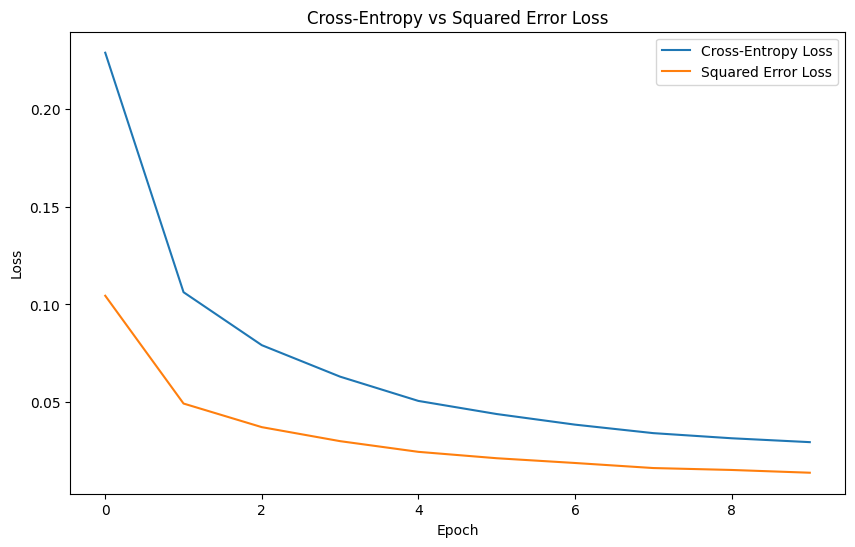

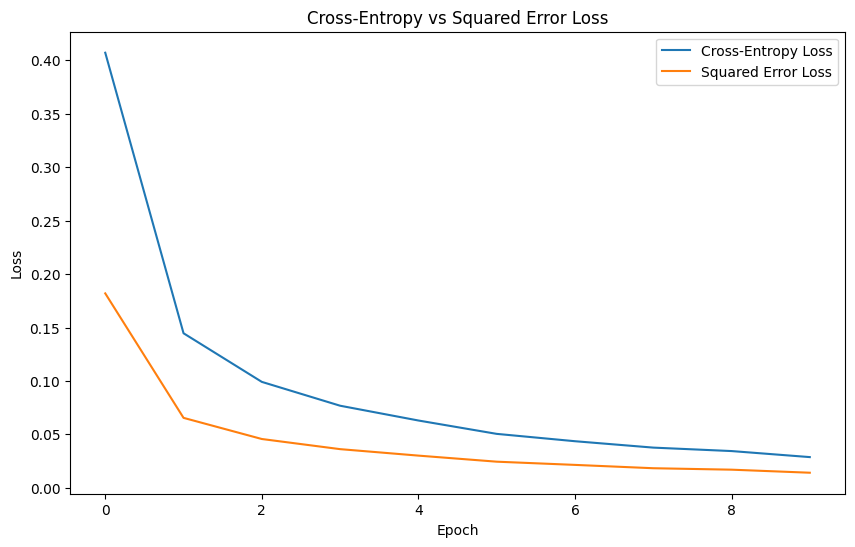

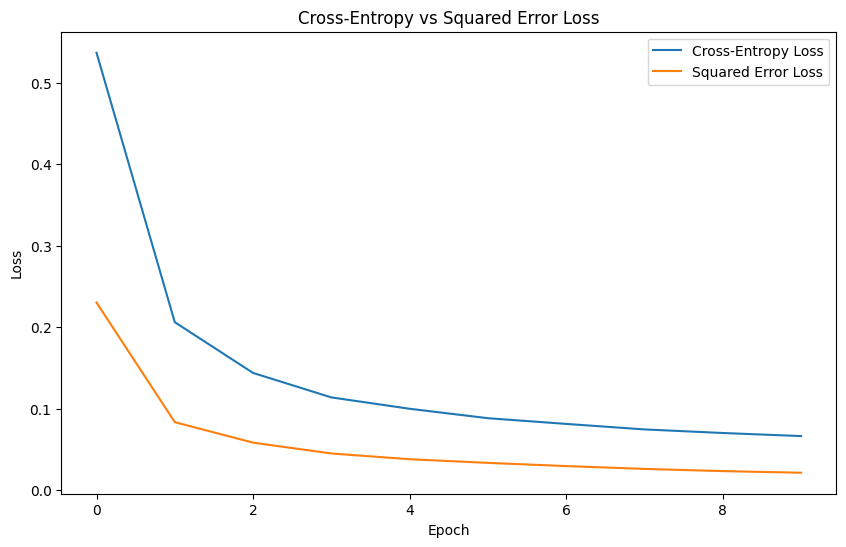

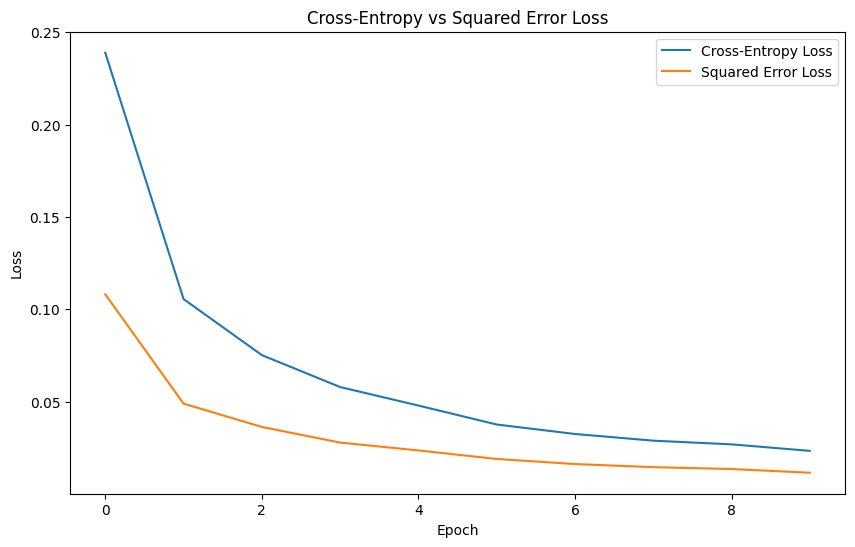

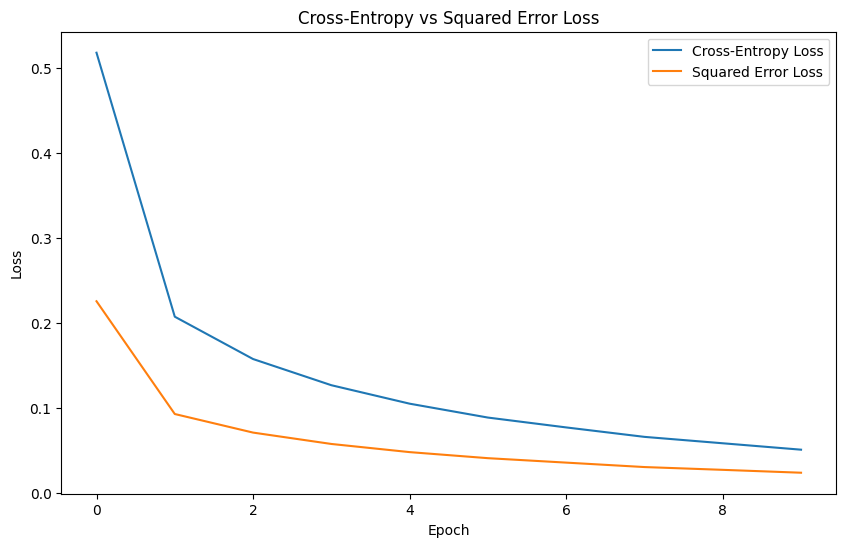

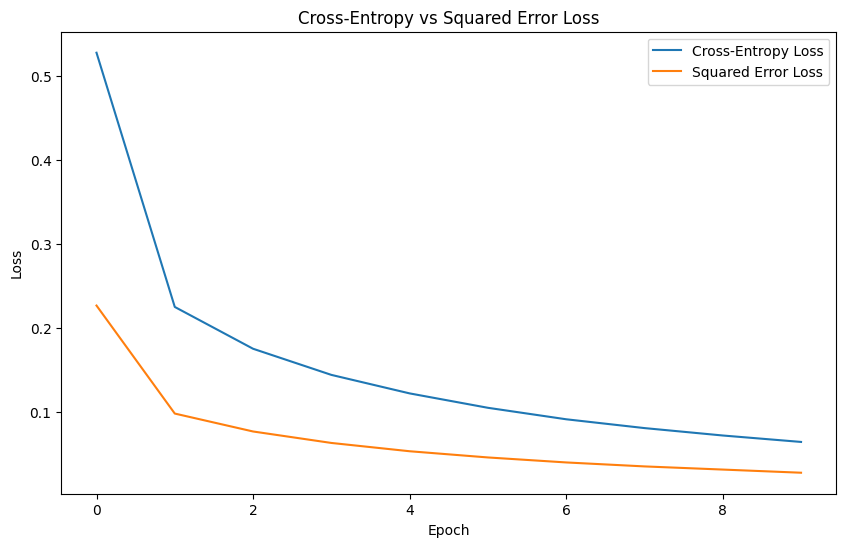

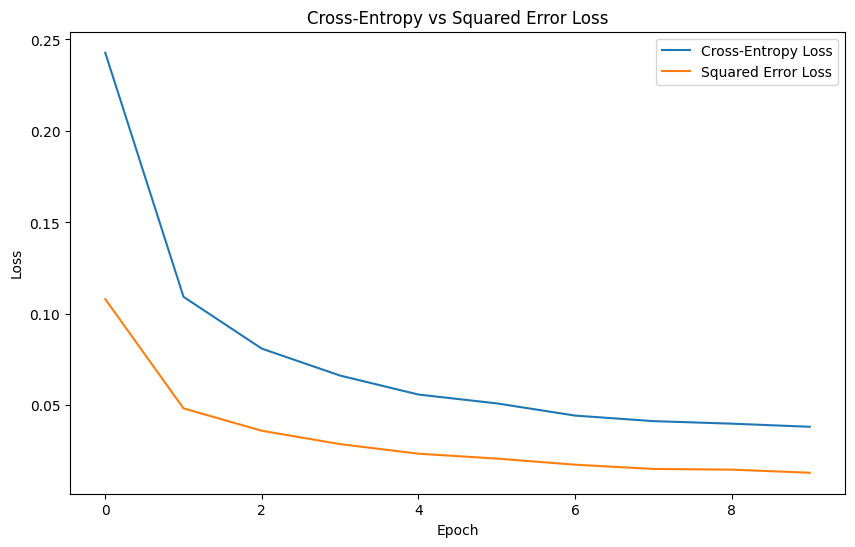

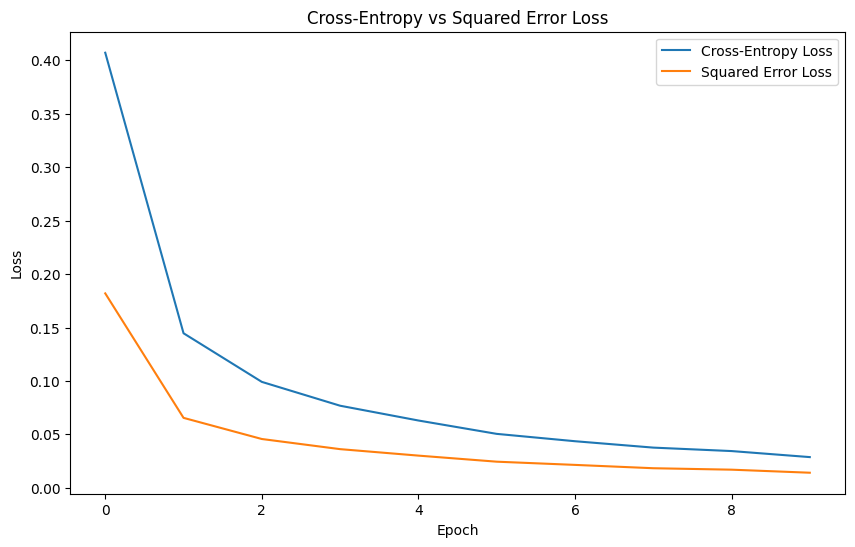

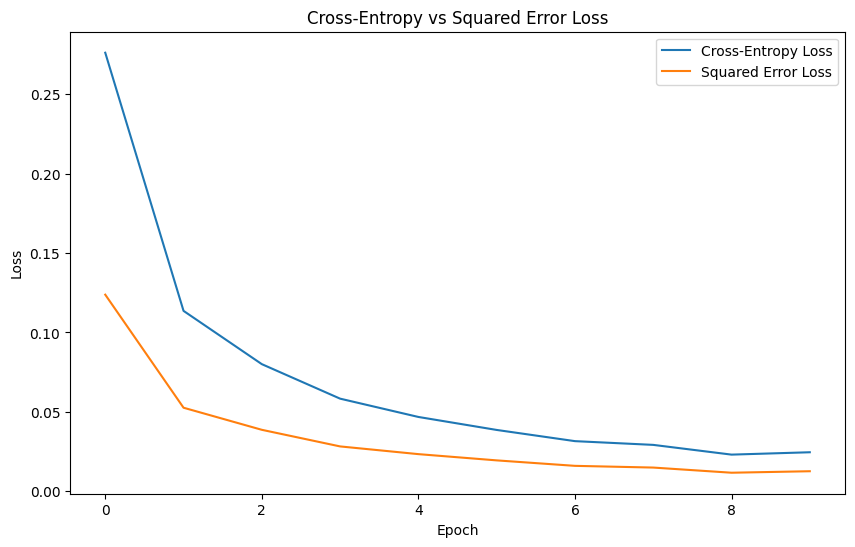

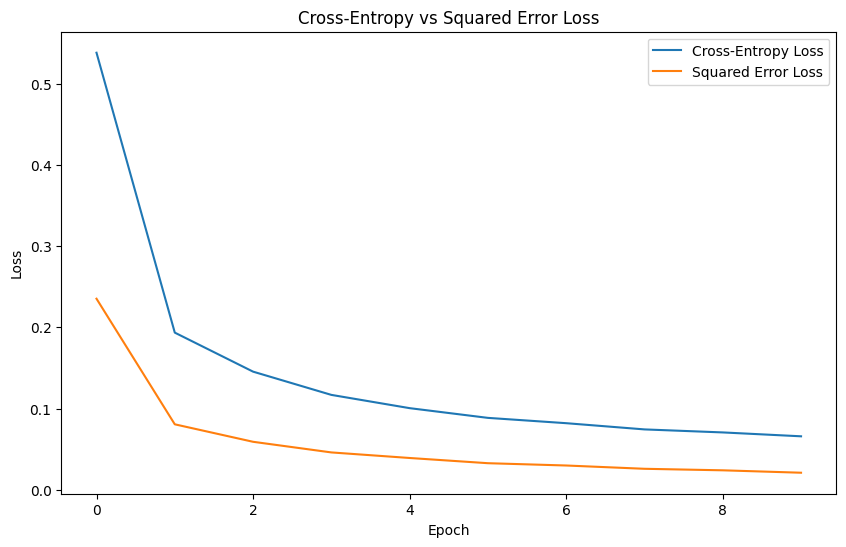

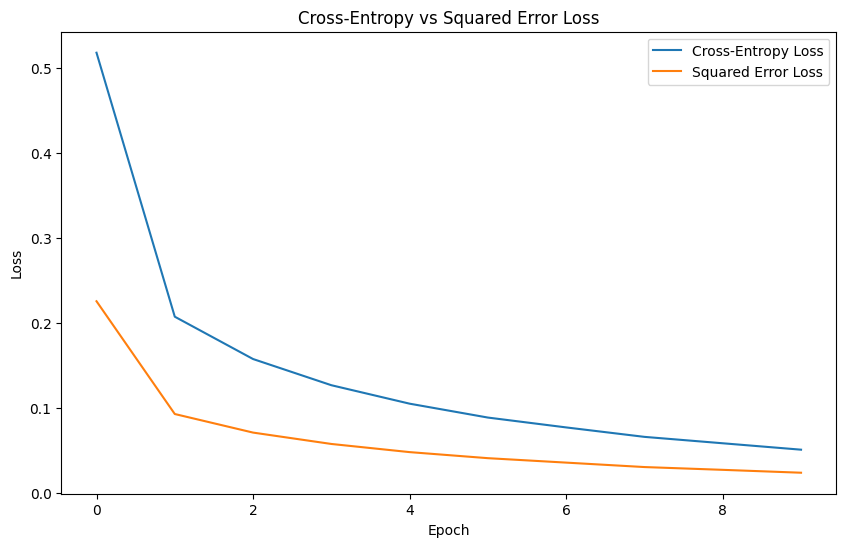

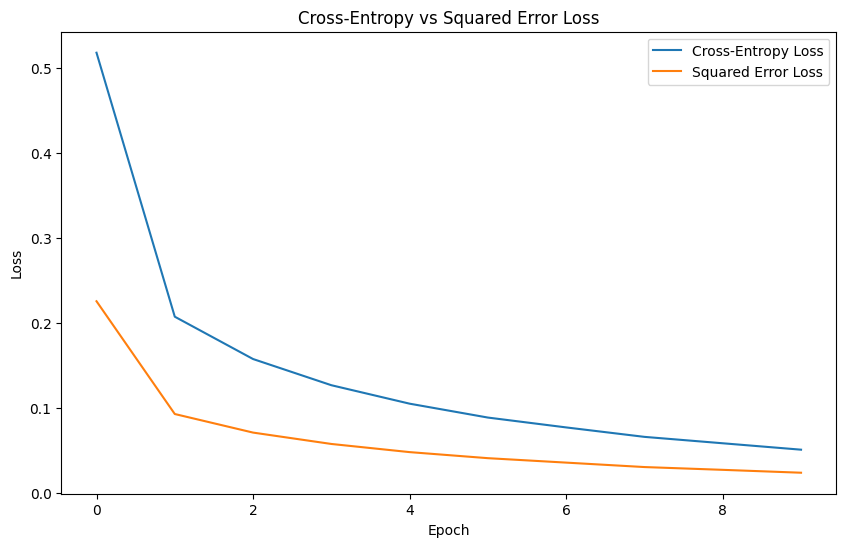

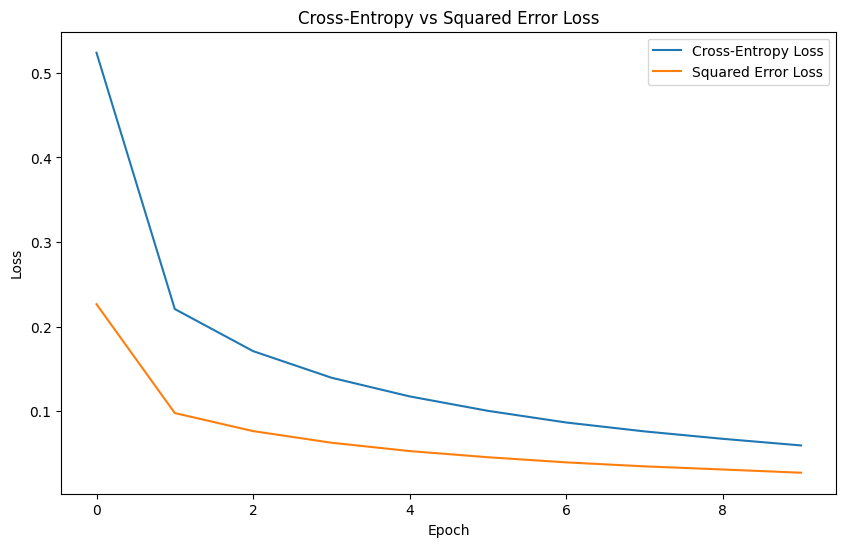

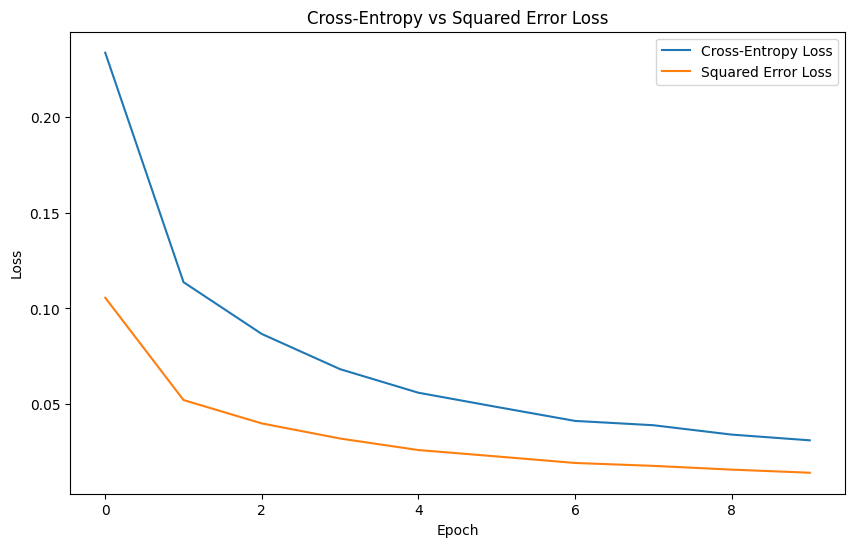

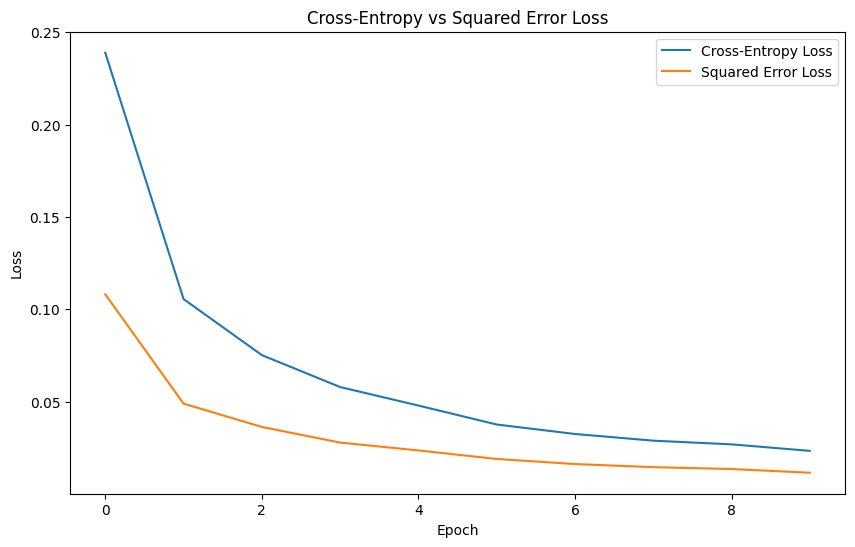

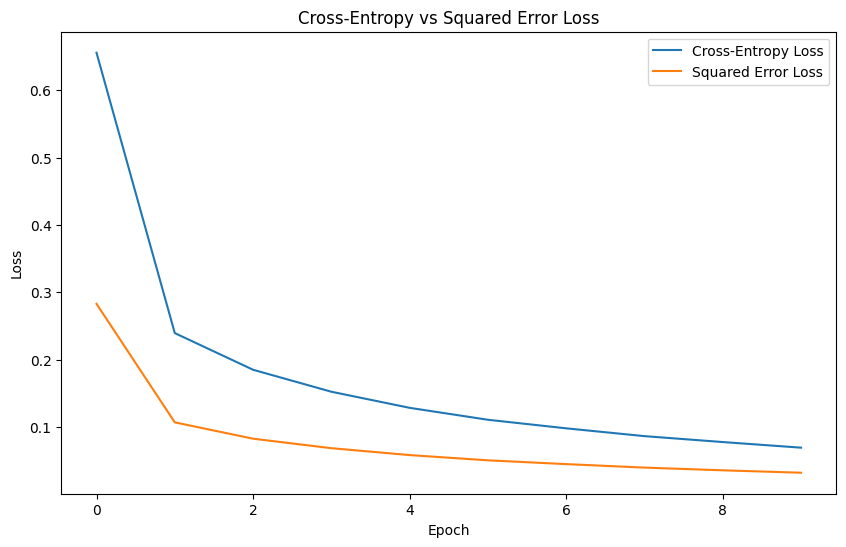

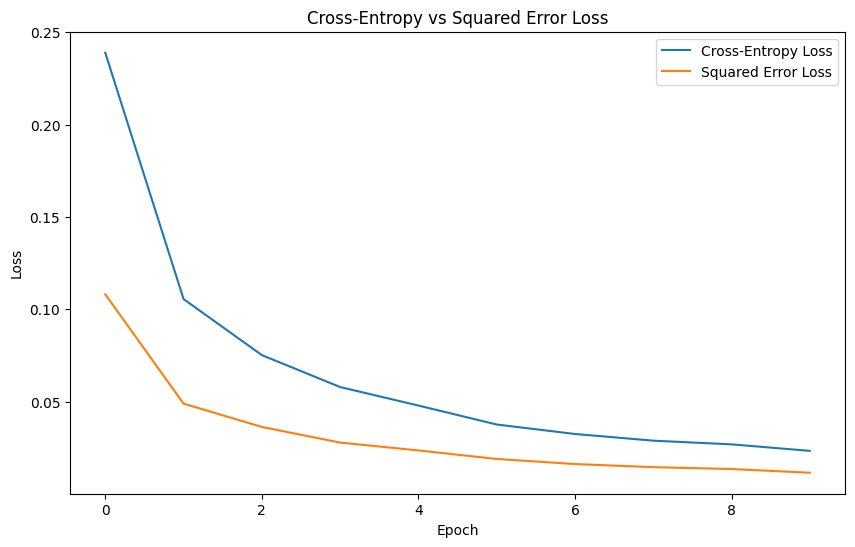

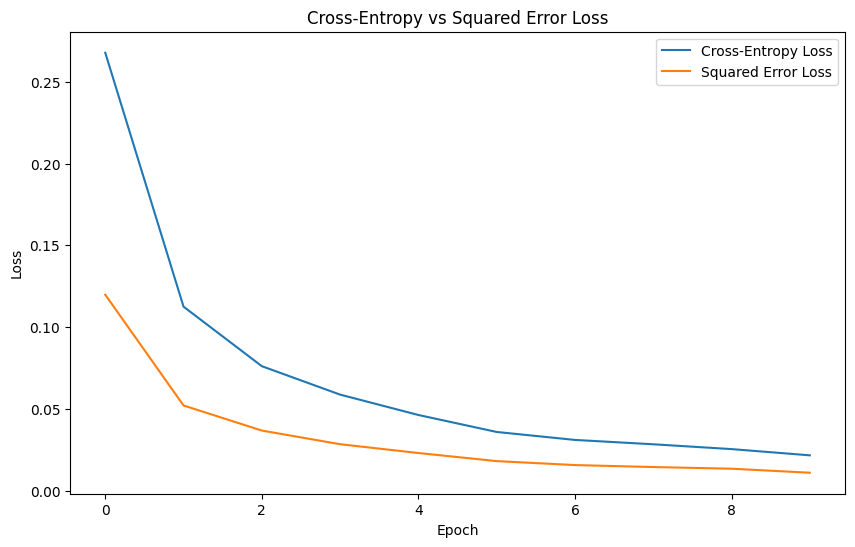

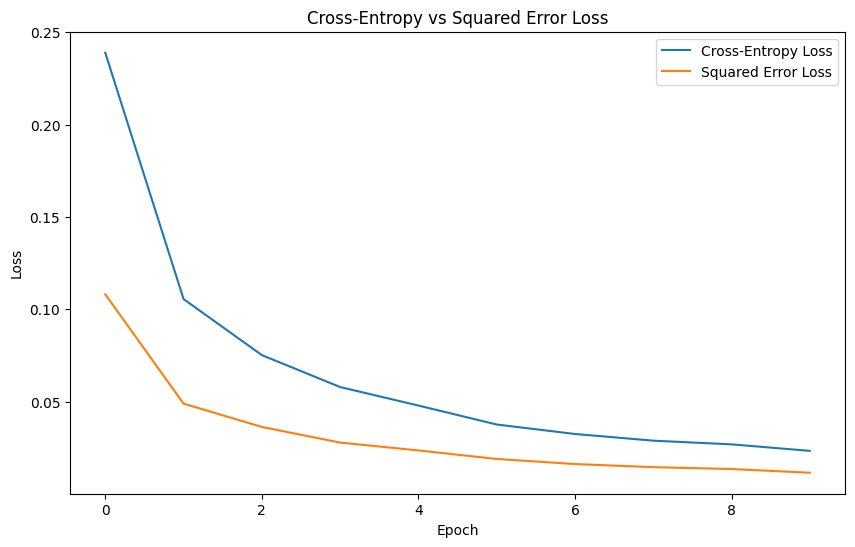

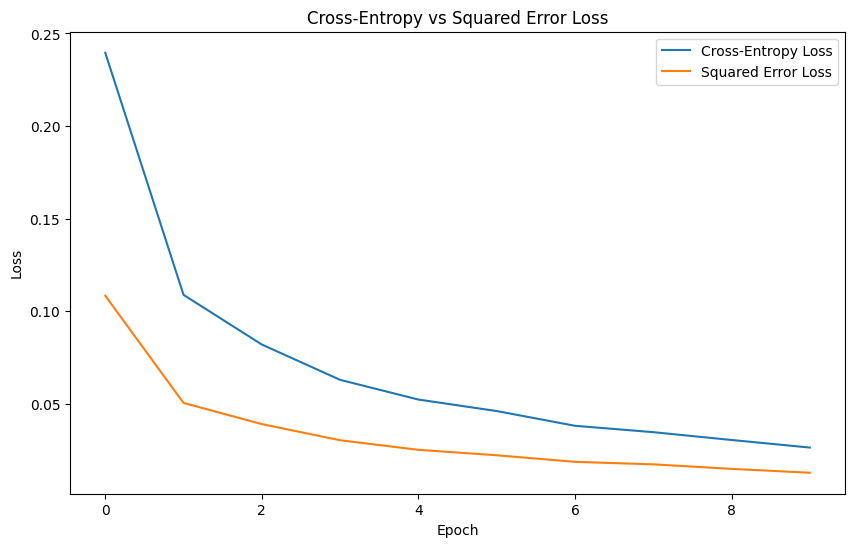

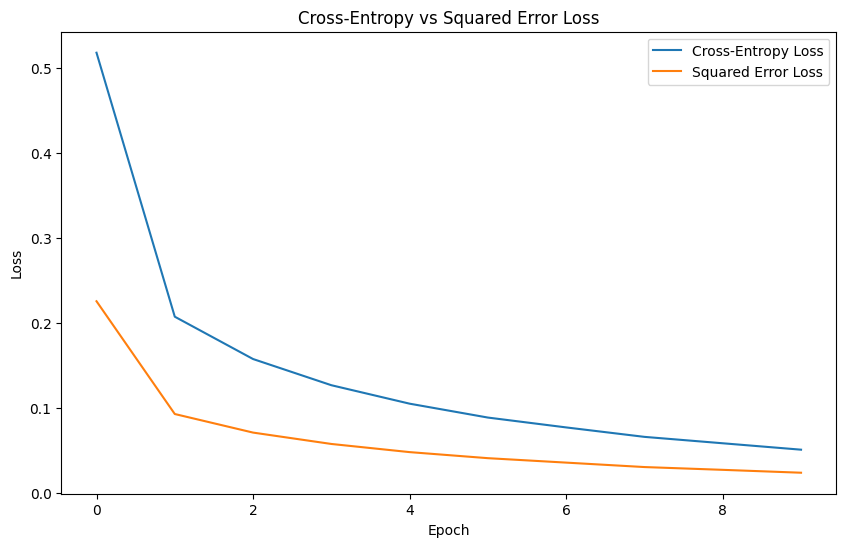

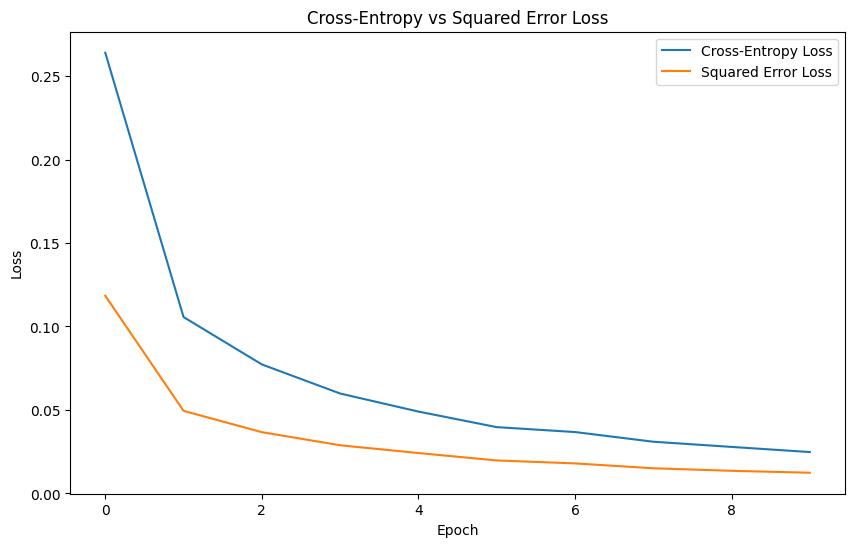

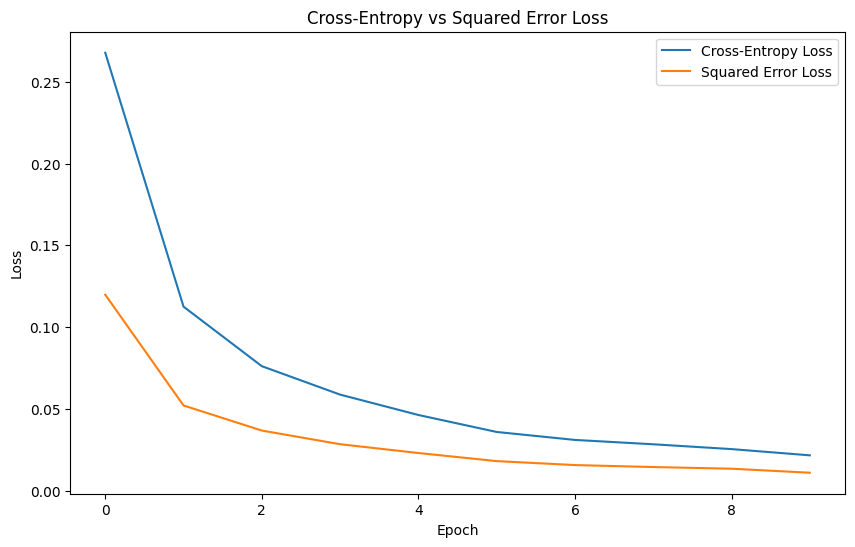

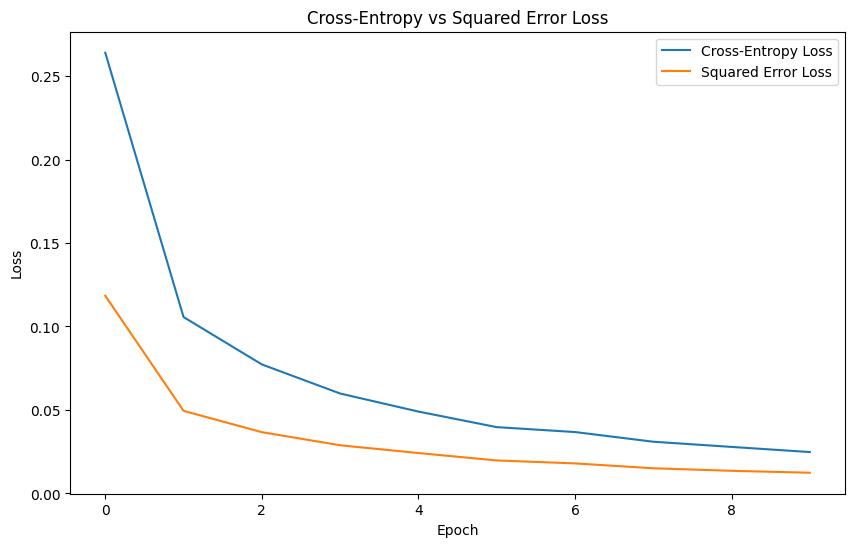

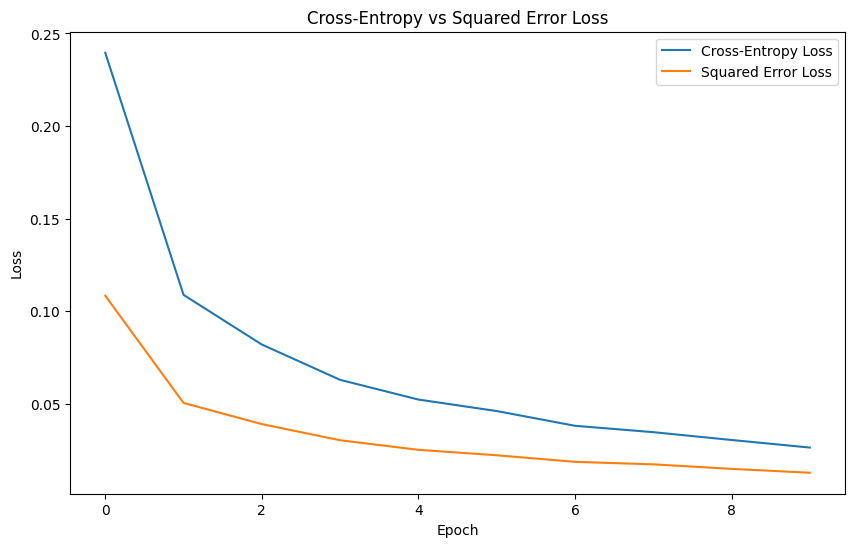

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
from keras.datasets import mnist
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

class FeedForward:
    def __init__(self, config):
        self.config = config
        self.layer_dims = self._create_architecture()
        self.theta = self._initialize_parameters()
        self.optimizer_state = {}
        (self.X_train, self.y_train), (self.X_val, self.y_val) = self._load_and_split_data()
        self._prepare_test_data()
        self._initialize_optimizer()

    def _create_architecture(self):
        layer_dims = [784]  # Input layer
        layer_dims += [self.config.hidden_size] * self.config.num_layers
        layer_dims.append(10)  # Output layer
        return layer_dims

    def _initialize_parameters(self):
        np.random.seed(42)
        theta = {}
        for l in range(1, len(self.layer_dims)):
            prev_dim = self.layer_dims[l-1]
            curr_dim = self.layer_dims[l]

            if self.config.weight_init == 'xavier':
                scale = np.sqrt(2.0/(prev_dim + curr_dim)) if self.config.activation == 'relu' \
                    else np.sqrt(1.0/prev_dim)
            else:
                scale = 0.01

            theta[f'W{l}'] = np.random.randn(curr_dim, prev_dim) * scale
            theta[f'b{l}'] = np.zeros((curr_dim, 1))
        return theta

    def _load_and_split_data(self):
        (X_train_full, y_train_full), (_, _) = mnist.load_data()
        m = X_train_full.shape[0]
        split = int(m * 0.9)

        X_train = X_train_full[:split].reshape(split, -1).T / 255.0
        y_train = np.eye(10)[y_train_full[:split]].T
        X_val = X_train_full[split:].reshape(m-split, -1).T / 255.0
        y_val = np.eye(10)[y_train_full[split:]].T

        return (X_train, y_train), (X_val, y_val)

    def _prepare_test_data(self):
        (_, _), (X_test, y_test) = mnist.load_data()
        self.X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0
        self.y_test = np.eye(10)[y_test].T

    def _activation(self, z, derivative=False):
        if self.config.activation == 'sigmoid':
            return self._sigmoid(z, derivative)
        elif self.config.activation == 'tanh':
            return self._tanh(z, derivative)
        elif self.config.activation == 'relu':
            return self._relu(z, derivative)

    @staticmethod
    def _sigmoid(z, derivative=False):
        if derivative:
            return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def _tanh(z, derivative=False):
        if derivative:
            return 1 - z**2
        return np.tanh(z)

    @staticmethod
    def _relu(z, derivative=False):
        if derivative:
            return (z > 0).astype(float)
        return np.maximum(0, z)

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)

    def forward(self, X):
        fpass = {}
        A = X
        L = len(self.theta) // 2

        for l in range(1, L):
            fpass[f'a{l}'] = np.dot(self.theta[f'W{l}'], A) + self.theta[f'b{l}']
            fpass[f'h{l}'] = self._activation(fpass[f'a{l}'])
            A = fpass[f'h{l}']

        fpass[f'a{L}'] = np.dot(self.theta[f'W{L}'], A) + self.theta[f'b{L}']
        fpass['y_hat'] = self._softmax(fpass[f'a{L}'])
        return fpass

    def backward(self, X, Y, fpass):
        grads = {}
        L = len(self.theta) // 2
        m = X.shape[1]
        d_aL = fpass['y_hat'] - Y

        for l in range(L, 0, -1):
            A_prev = X if l == 1 else fpass[f'h{l-1}']
            grads[f'W{l}'] = np.dot(d_aL, A_prev.T)/m
            grads[f'b{l}'] = np.sum(d_aL, axis=1, keepdims=True)/m

            if self.config.weight_decay > 0:
                grads[f'W{l}'] += (self.config.weight_decay * self.theta[f'W{l}'])/m

            if l > 1:
                d_h = np.dot(self.theta[f'W{l}'].T, d_aL)
                d_aL = d_h * self._activation(fpass[f'h{l-1}'], derivative=True)

        return grads

    def compute_loss(self, y, y_hat):
        cross_entropy = -np.mean(np.sum(y * np.log(y_hat + 1e-9), axis=0))
        if self.config.weight_decay > 0:
            l2_penalty = sum(np.sum(np.square(w)) for w in self.theta.values() if w.ndim > 1)
            cross_entropy += (self.config.weight_decay * l2_penalty)/(2 * y.shape[1])
        return cross_entropy

    def compute_squared_loss(self, y, y_hat):
        return np.mean(np.sum((y - y_hat)**2, axis=0))


    def _initialize_optimizer(self):
        opt = self.config.optimizer
        if opt in ['momentum', 'nesterov']:
            self.optimizer_state = {k: np.zeros_like(v) for k, v in self.theta.items()}
        elif opt in ['rmsprop']:
            self.optimizer_state = {k: np.zeros_like(v) for k, v in self.theta.items()}
        elif opt in ['adam', 'nadam']:
            self.optimizer_state = {
                'm': {k: np.zeros_like(v) for k, v in self.theta.items()},
                'v': {k: np.zeros_like(v) for k, v in self.theta.items()},
                't': 0
            }

    def _update_parameters(self, grads):
        opt = self.config.optimizer
        lr = self.config.lr
        beta = 0.9
        beta1, beta2 = 0.9, 0.999
        epsilon = 1e-8

        if opt == 'sgd':
            for key in self.theta:
                self.theta[key] -= lr * grads[key]

        elif opt in ['momentum', 'nesterov']:
            for key in self.theta:
                self.optimizer_state[key] = beta * self.optimizer_state[key] + (1 - beta) * grads[key]
                self.theta[key] -= lr * self.optimizer_state[key]

                if opt == 'nesterov':
                    self.theta[key] -= lr * beta * self.optimizer_state[key]

        elif opt == 'rmsprop':
            for key in self.theta:
                self.optimizer_state[key] = beta * self.optimizer_state[key] + (1 - beta) * np.square(grads[key])
                self.theta[key] -= lr * grads[key] / (np.sqrt(self.optimizer_state[key]) + epsilon)

        elif opt in ['adam', 'nadam']:
            self.optimizer_state['t'] += 1
            m = self.optimizer_state['m']
            v = self.optimizer_state['v']

            for key in self.theta:
                m[key] = beta1 * m[key] + (1 - beta1) * grads[key]
                v[key] = beta2 * v[key] + (1 - beta2) * np.square(grads[key])

                m_hat = m[key] / (1 - beta1**self.optimizer_state['t'])
                v_hat = v[key] / (1 - beta2**self.optimizer_state['t'])

                if opt == 'nadam':
                    m_hat = beta1 * m_hat + (1 - beta1) * grads[key]

                self.theta[key] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)

    def train(self):
        X, Y = self.X_train, self.y_train
        m = X.shape[1]
        batch_size = self.config.batch_size or m
        steps_per_epoch = m // batch_size

        cross_entropy_losses = []
        squared_losses = []

        for epoch in range(self.config.epochs):
            permutation = np.random.permutation(m)
            X_shuffled = X[:, permutation]
            Y_shuffled = Y[:, permutation]

            epoch_cross_entropy_loss = 0
            epoch_squared_loss = 0

            for step in range(steps_per_epoch):
                start = step * batch_size
                end = start + batch_size
                X_batch = X_shuffled[:, start:end]
                Y_batch = Y_shuffled[:, start:end]

                fpass = self.forward(X_batch)
                grads = self.backward(X_batch, Y_batch, fpass)
                self._update_parameters(grads)

                epoch_cross_entropy_loss += self.compute_loss(Y_batch, fpass['y_hat'])
                epoch_squared_loss += self.compute_squared_loss(Y_batch, fpass['y_hat'])

            cross_entropy_losses.append(epoch_cross_entropy_loss / steps_per_epoch)
            squared_losses.append(epoch_squared_loss / steps_per_epoch)

            # Validation
            val_fpass = self.forward(self.X_val)
            val_cross_entropy = self.compute_loss(self.y_val, val_fpass['y_hat'])
            val_squared_loss = self.compute_squared_loss(self.y_val, val_fpass['y_hat'])
            val_acc = self.accuracy(self.X_val, self.y_val)

            wandb.log({
                "epoch": epoch,
                "train_cross_entropy": cross_entropy_losses[-1],
                "train_squared_loss": squared_losses[-1],
                "val_cross_entropy": val_cross_entropy,
                "val_squared_loss": val_squared_loss,
                "val_acc": val_acc
            })

        return cross_entropy_losses, squared_losses


    def accuracy(self, X, y):
        fpass = self.forward(X)
        predictions = np.argmax(fpass['y_hat'], axis=0)
        labels = np.argmax(y, axis=0)
        return np.mean(predictions == labels)


    def compute_confusion_matrix(self, X, y):
      fpass = self.forward(X)
      predictions = np.argmax(fpass['y_hat'], axis=0)
      labels = np.argmax(y, axis=0)
      return wandb.plot.confusion_matrix(
          y_true=labels,
          preds=predictions,
          class_names=range(10)
      )




def main():
    wandb.init()
    config = wandb.config

    wandb.run.name = (
        f"D4deb_hl{config.num_layers}_bs{config.batch_size}_"
        f"{config.activation[:3]}_lr{config.lr}_"
        f"{config.optimizer[:3]}_wd{config.weight_decay}"
    )

    model = FeedForward(config)
    cross_entropy_losses, squared_losses = model.train()

    # Generate comparison plot
    plt.figure(figsize=(10, 6))
    plt.plot(cross_entropy_losses, label='Cross-Entropy Loss')
    plt.plot(squared_losses, label='Squared Error Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Cross-Entropy vs Squared Error Loss')
    plt.legend()

    # Log the plot to wandb
    wandb.log({"loss_comparison": wandb.Image(plt)})

    test_acc = model.accuracy(model.X_test, model.y_test)
    confusion_matrix = model.compute_confusion_matrix(model.X_test, model.y_test)

    wandb.log({
        "test_acc": test_acc,
        "confusion_matrix": confusion_matrix,
    })


# Sweep configuration
sweep_config = {
    'method': 'bayes',
    'metric': {'name': 'val_acc', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [10]},
        'num_layers': {'values': [3, 4]},
        'hidden_size': {'values': [128]},
        'weight_decay': {'values': [0, 0.0005]},
        'lr': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['relu']}
    }
}

sweep_id = wandb.sweep(sweep_config, project="DL_A1")
wandb.agent(sweep_id, function=main, count=25)
wandb.finish()
